# **MATH&ML-9. Математика ансамблевых методов**

# 1. Введение

✍ Представьте, что вы выполняете важный проект по машинному обучению. Конечно, вы можете делать всё самостоятельно, но если вы дополнительно узнаете мнение коллег, попросите ментора проверить ваши расчёты, найдёте как можно больше информации по вашей теме, то точно получите наилучший результат, ведь вы учтёте не только свои знания и выводы, но и информацию от других компетентных людей.

Составление прогнозов в машинном обучении может следовать такой же логике: один алгоритм часто даёт далёкий от желаемой точности прогноз, ведь у каждого метода есть свои ограничения, и в целом создание модели, которая строит очень близкие к реальности предсказания, — достаточно сложная задача. Однако если мы обучим на наших данных несколько моделей и обобщим результаты определённым образом, то сможем получить куда более точный результат.

Такой алгоритм решения задач машинного обучения называется **ансамблем моделей**.

> **Ансамбль моделей** — это метод, в котором несколько алгоритмов (или вариации одного и того же) обучаются на одних данных, а итоговый прогноз строится на основе всех полученных от моделей прогнозов.

![](https://lms.skillfactory.ru/assets/courseware/v1/c284641ce53a2d60f7bfedb59aa830a3/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_1_1.png)

Вы уже встречались с ансамблями, однако последние модули существенно обогатили ваши знания по математике, и теперь вы сможете изучить математическую основу и тонкости данных методов: особенности настройки параметров, различные библиотеки, нюансы применения тех или иных ансамблей. Это сделает вас более компетентными специалистами, глубоко понимающими суть применяемых методов.

### Задание 1.7

Найдите минимум функции \(x^{2}+x y-y+y^{3}\).

В качестве ответа введите координату по оси ординат. Ответ округлите до двух знаков после точки-разделителя.

In [29]:
from sympy import *

f, x, y = symbols('f x y')

f = x**2 + x*y - y + y**3

diff_x  = f.diff(x)

diff_y  = f.diff(y)

extr = solve([diff_x, diff_y], [x, y])

print('Точки экстремумов (x, y): ', extr)

print('Значение функции в первой точке: ', f.subs([(x, extr[0][0]), (y, extr[0][1])]))

print('Значение функции во второй точке: ', f.subs([(x, extr[1][0]), (y, extr[1][1])]))

Точки экстремумов (x, y):  [(-1/3, 2/3), (1/4, -1/2)]
Значение функции в первой точке:  -13/27
Значение функции во второй точке:  5/16


⭐ Вы справились с тестированием — поздравляем! Теперь вы точно можете быть уверены, что ваша подготовка достаточна для освоения данного модуля. Прежде чем приступить, давайте обозначим основные цели на следующие семь юнитов:

1. **Изучить основную терминологию, связанную с ансамблями моделей.**
Мы повторим уже знакомые вам основные понятия, которые используются в ансамблях, и познакомимся с рядом новых.
2. **Подробно разобрать реализацию разных видов ансамблей с математической и смысловой точек зрения.**
Мы намного подробнее, чем раньше, разберём все алгоритмы и изучим их математическую составляющую, чтобы лучше понимать принцип их работы, уметь более тонко их настраивать и за счёт этого добиваться наилучшей эффективности.
3. **Научиться решать задачи регрессии и классификации с использованием ансамблей моделей.**
Конечно же, полученные знания мы будем использовать для решения настоящих практических задач.
4. **Научиться настраивать параметры моделей для повышения прогностической точности.**
Мы рассмотрим параметры алгоритмов, которые можно регулировать, и разберёмся, как менять каждый из них для повышения точности предсказания.

Важно обозначить, что мы будем рассматривать три вида построения ансамблей: бэггинг, бустинг и стекинг. Для каждого из них мы изучим популярные вариации, программную реализацию и, конечно же, сравним их эффективность при решении задач.

В результате освоения этого модуля вы сможете применять ансамблевые методы для решения задач машинного обучения. Вы не просто будете знать плюсы и минусы ансамблевых методов и то, какие из них уместны в том или ином случае, но также будете понимать их суть и математическую составляющую.

Итак, вперёд к ансамблям! →

# 2. Ансамбли моделей. Бутстреппинг. Бэггинг

✍ В этом юните вы углубите свои знания ансамблей алгоритмов. Вы познакомитесь с тем, как формируются бутстреп-выборки, а также досконально изучите принцип **бэггинга** — самого простого варианта ансамблей.

В основе бэггинга лежит статистический метод, который называется **бутстрепом (bootstrap)**. Идея бутстрепа заключается в генерации выборок размера n из исходного датасета размера N путём случайного выбора элементов с повторениями в каждом из наблюдений.

**Рассмотрим идею бутстрепа на элементарном примере.**

Пусть у нас есть выборка из 12 клиентов компании: у каждого из них есть свой ID (от 1 до 12) и какие-то характеристики. Мы можем создавать из данной выборки множество различных новых выборок клиентов с новым количеством человек (в данном случае представлены выборки из пяти человек). При этом информацию про одного и того же клиента можно использовать повторно.

![](https://lms.skillfactory.ru/assets/courseware/v1/95929bfe488e7dd592014067919c91ad/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_2_1.png)

Это намного проще, чем находить новые выборки. По сути, мы собираем данные лишь единожды, а затем на их основе генерируем много выборок для обучения моделей. Это экономит огромные объёмы ресурсов и времени.

При некотором приближении можно считать, что получающиеся выборки являются независимыми и репрезентативными — **это важное допущение**.

Выборки можно назвать **независимыми**, если результаты испытаний и измерения, осуществляемые для одной выборки, никак не влияют на результаты, получаемые на другой выборке.

**Репрезентативность** заключается в соответствии характеристик выборки всей генеральной совокупности.

К примеру, если мы хотим исследовать мнение всех женщин России по какому-то вопросу, то все женщины России — это **генеральная совокупность**.

**Репрезентативная выборка** — это такая группа женщин, для которой основные характеристики соответствуют характеристикам для генеральной совокупности. Допустим, если среди всех российских женщин 60 % имеют детей, а 40 % — не имеют, то соотношение в выборке должно быть таким же.

Бутстреп-выборки часто используются для оценки различных статистических показателей, например разброса или доверительного интервала.

Если вычислять статистические оценки на нескольких независимых выборках, то мы можем, например, оценить их математическое ожидание или разброс. Приведём пример того, как это происходит с точки зрения математики.

Допустим, у нас есть некоторая выборка $x=(5,1,3,6,4)$, и мы хотим оценить для неё математическое ожидание. Например, это может быть выборка количества товаров, которые приобретали покупатели нашего магазина, и мы хотим найти ожидаемое количество товаров, которое купит случайный клиент.

Конечно, мы без проблем можем его вычислить:

$$E(x) =E(5,1,3,6,4) = \frac{1}{5} \cdot 5 + \frac{1}{5} \cdot1 + \frac{1}{5} \cdot3 + \frac{1}{5} \cdot6 + \frac{1}{5} \cdot4 = 1+0.2 +0.6 + 1.2 + 0.8 = 3.8$$

Однако это значение лишь на одной выборке, а мы хотели бы вычислить эту статистическую оценку на нескольких выборках и затем проанализировать разброс оценок.

Создаём несколько выборок с помощью бутстрепа и на каждой оцениваем математическое ожидание:

![](https://lms.skillfactory.ru/assets/courseware/v1/880fd8813d3d070f2434c836167af820/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_2_2.png)

Получили ряд значений:

$4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2$

Теперь давайте найдём дисперсию для этого ряда. Мы с вами делали это в модуле по теории вероятностей — самое время вспомнить!

### Задание 2.2

Вычислите дисперсию для этого ряда. Результат округлите до трёх знаков после точки-разделителя.

In [30]:
from statistics import pvariance

pvariance([4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2]).__round__(3)

0.317

Таким образом, мы понимаем, что если мы будем создавать различные новые выборки и вычислять для них средние значения, то для полученных значений дисперсия будет равна найденному вами выше значению. **Заметьте: мы узнали это, не собирая никаких новых данных.**

Формализуем только что проделанные действия математически:

1. Генерируем выборки. Необходимо создавать упорядоченные множества элементов, которые мы выбираем с возвратом из некоторого имеющегося у нас множества:

$$\left\{X_{1}, \ldots, X_{N}\right\}$$

2. Повторяем несколько раз процедуру генерации выборки:

$$X_{b}^{*}=\left(X_{b 1}^{*}, \ldots, X_{b N}^{*}\right), \ где \ 1 \leqslant b \leqslant B$$

3. Считаем интересующую нас статистику по каждой выборке:

$$T_{1}^{*}=T\left(X_{1}^{*}\right), \ldots, T_{B}^{*}=T\left(X_{B}^{*}\right)$$

4. Получаем бутстрепную оценку для интересующей нас статистики по этой выборке статистик. Например, для дисперсии она будет вычисляться так:
Отлично, мы разобрались с тем, что такое метод бутстрепа. Запомните его идею — совсем скоро она пригодится вам для понимания алгоритма бэггинга.

$$\widehat{D}_{\text {boot }}=\frac{1}{B} \sum_{b=1}^{B} T_{b}^{* 2}-\left(\frac{1}{B} \sum_{b=1}^{B} T_{b}^{*}\right)^{2}$$

Отлично, мы разобрались с тем, что такое метод бутстрепа. Запомните его идею — совсем скоро она пригодится вам для понимания алгоритма бэггинга.

## BIAS И VARIANCE

Прежде чем перейти непосредственно к ансамблям моделей, нам необходимо повторить bias-variance decomposition, или, как его называют по-русски, «разложение ошибки на смещение и разброс». Оно очень полезно для анализа ансамблей моделей.

> **Смещение** — это разница между математическим ожиданием для прогноза и реальным значением:
>
> $$Bias[\hat{f}(x)] = E[\hat{f}(x)]-y$$

Здесь:

* $E[\hat{f}(x)]$ — математическое ожидание для прогноза,
* $y$ — реальное значение функции.

**Смысл смещения** — способность получить лучшую среди всех возможных моделей, то есть максимально точные прогнозы.

**Алгоритмы со стабильно маленьким смещением:**
* KNN (n = 1);
* метод опорных векторов;
* деревья решений с большой глубиной.

**Алгоритмы с большим смещением:**
* линейная регрессия;
* логистическая регрессия;
* деревья решений с маленькой глубиной.


Также значение смещения часто называют **ошибкой смещения** или **ошибкой из-за смещения**.

Если у модели большое смещение, это значит, что ошибка будет достаточно велика из-за слишком сильного упрощения модели.

> **Разброс** — это величина разницы в результатах обучения модели на разных выборках:
>
> $$\operatorname{Var}[\hat{f}(x)]=\mathrm{E}\left[\left(\mathrm{E}[\hat{f}(x)]-\hat{f}(x)\right)^{2}\right]$$

**Примечание**. С математической точки зрения разброс модели определяется как математическое ожидание квадрата разницы ожидаемого прогноза и реализованного прогноза модели.

Разброс характеризует устойчивость модели к изменениям в обучающей выборке:

* Если результат сильно зависит от того, какие объекты присутствуют в выборке, разброс будет большим.
* Если алгоритм работает стабильно вне зависимости от особенностей выборки, разброс будет маленьким.



**Алгоритмы, показывающие маленький разброс:**
* линейная регрессия;
* логистическая регрессия;
* деревья решений с маленькой глубиной.

**Алгоритмы, показывающие большой разброс:**
* деревья решений с большой глубиной;
* KNN;
* метод опорных векторов.


Давайте рассмотрим разложение на смещение и разброс для линейной регрессии.

Пусть мы хотим предсказать значение y по значениям вектора $x$. Тогда зависимость $y$ от $x$ можно записать следующим образом:

$$y=f(x)+\varepsilon$$

В качестве $f(x)$ здесь выступает истинная зависимость ответов $y$ от характеристик объекта $x$ — мы её не знаем и пытаемся предсказать с помощью модели. Предсказания обозначим как $\hat{f}(x)$. Символом $\varepsilon$ обозначается случайная ошибка. Предполагается, что её математическое ожидание равно нулю — это просто шум.

Тогда давайте выразим ошибку для какого-то значения $х$. Она будет равняться математическому ожиданию для квадрата разницы между реальным и предсказанным значениями. По сути, это просто среднеквадратичная ошибка, записанная в немного иной форме:

$$\operatorname{Err}(x)=E\left[(y-\hat{f}(x))^{2}\right]$$

Также мы можем разложить среднеквадратичную ошибку следующим образом:

$$\operatorname{Err}(x)=(E[\hat{f}(x)]-y)^{2}+E\left[(\hat{f}(x)-E[\hat{f}(x)])^{2}\right]+\sigma_{\varepsilon}^{2}$$

$$\operatorname{Err}(x)=\operatorname{Bias}^{2}+Variance+Irreducible Error$$



### Доказательство равенства

Для начала представим $y$ как сумму значения функции $f$ и ошибки (вместо $f(x)$ будем далее для краткости писать просто $f$):

$$\mathrm{E}\left[(y-\hat{f})^{2}\right]=\mathrm{E}\left[(f+\varepsilon-\hat{f})^{2}\right]$$

Теперь в выражение, от которого мы ищем математическое ожидание, добавим математическое ожидание предсказанной функции и вычтем его же (это нужно для того, чтобы далее мы смогли выразить необходимые нам величины). Разумеется, если мы прибавляем какую-то величину, а потом её вычитаем, результат остаётся тем же.

$$=\mathrm{E}\left[(f+\varepsilon-\hat{f}+\mathrm{E}[\hat{f}]-\mathrm{E}[\hat{f}])^{2}\right]$$

Далее раскроем скобки, то есть возведём в квадрат сумму трёх слагаемых:

* $f-\mathrm{E}[\hat{f}]$,

* $\varepsilon$,

* $\mathrm{E}[\hat{f}]-\hat{f}$.

**Примечание**. Для разложения пользуемся формулой из алгебры:

$$(a+b+c)^{2}=a^{2}+b^{2}+c^{2}+2 a b+2 a c+2 b c$$



Получаем:

$=\mathrm{E}\left[(f-\mathrm{E}[\hat{f}])^{2}\right]+\mathrm{E}\left[\varepsilon^{2}\right]+\mathrm{E}\left[(\mathrm{E}[\hat{f}]-\hat{f})^{2}\right]+2 \mathrm{E}[(f-\mathrm{E}[\hat{f}]) \varepsilon]+2 \mathrm{E}[\varepsilon(\mathrm{E}[\hat{f}]-\hat{f})]+2 \mathrm{E}[(\mathrm{E}[\hat{f}]-\hat{f})(f-\mathrm{E}[\hat{f}])]$

$=(f-\mathrm{E}[\hat{f}])^{2}+\mathrm{E}\left[\varepsilon^{2}\right]+\mathrm{E}\left[(\mathrm{E}[\hat{f}]-\hat{f})^{2}\right]+2(f-\mathrm{E}[\hat{f}]) \mathrm{E}[\varepsilon]+2 \mathrm{E}[\varepsilon] \mathrm{E}[\mathrm{E}[\hat{f}]-\hat{f}]+2 \mathrm{E}[\mathrm{E}[\hat{f}]-\hat{f}](f-\mathrm{E}[\hat{f}])$

Сокращаем одинаковые слагаемые:

$=(f-\mathrm{E}[\hat{f}])^{2}+\mathrm{E}\left[\varepsilon^{2}\right]+\mathrm{E}\left[(\mathrm{E}[\hat{f}]-\hat{f})^{2}\right]$

Видим, что у нас есть дисперсия ошибки и дисперсия предсказания:

$=(f-\mathrm{E}[\hat{f}])^{2}+\operatorname{Var}[\varepsilon]+\operatorname{Var}[\hat{f}]$

$=\operatorname{Bias}[\hat{f}]^{2}+\sigma^{2}+\operatorname{Var}[\hat{f}]$

Итак, мы получили, что наша ошибка — это сумма смещения для квадрата прогноза, разброса и неустранимой случайной ошибки. Теперь мы понимаем, из чего состоит ошибка модели. Такое представление помогает нам исследовать с теоретической точки зрения некоторые алгоритмы машинного обучения и часто используется при изучении ансамблей.

Итак, мы получили, что наша ошибка — это сумма смещения для квадрата прогноза, разброса и неустранимой случайной ошибки. Теперь мы понимаем, из чего состоит ошибка модели. Такое представление помогает нам исследовать с теоретической точки зрения некоторые алгоритмы машинного обучения и часто используется при изучении ансамблей.

Рассмотрим иллюстрацию того, как сдвиг и разброс влияют на качество предсказания. На рисунке ниже вы видите цель (красный круг), в которую мы хотим попасть.

Есть четыре ситуации:

![](https://img.genial.ly/5fdc5ca1853b5759f6e69400/5040dd83-7a8e-444e-8fc0-a3445064b968.png)



В моделях машинного обучения принцип тот же, только в качестве центра мишени выступает минимально возможная ошибка.

Когда говорят про разложение на bias и variance, то часто упоминают некую **точку баланса**:

* Если модель очень простая, с маленьким количеством параметров, то, скорее всего, у неё будет очень большое смещение, но маленький разброс.
* Если модель очень сложная, со множеством параметров, у неё будет большой разброс и маленькое смещение.

Схематично эти зависимости можно изобразить следующим образом (это схема не для конкретной модели, а лишь иллюстрация тенденций):

![](https://lms.skillfactory.ru/assets/courseware/v1/eccb230bf722e42b7fbeeadddf60daae/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_2_4.png)

На графике выше по оси абсцисс отложена сложность модели ($Model \ Complexity$), а по оси ординат — ошибка ($Error$). Также изображены смещение ($Bias^2$), разброс ($Variance$) и ошибка ($Total \ Error$ — сумма смещения и разброса).

Как вы можете видеть, есть некоторая оптимальная точка, в которой разброс и смещение небольшие, а ошибка минимальна. Именно эта точка нас и интересует.

## БЭГГИНГ

Перейдём к понятию **бэггинг**.

При построении моделей всегда есть вероятность, что при обучении на других данных получились бы другие результаты. Для того чтобы нивелировать такую вероятность, можно использовать бэггинг.

Его идея состоит в том, что мы берём несколько независимых моделей и усредняем полученные по ним результаты. Таким образом мы получаем модель, имеющую меньший разброс, так как при её построении мы учли несколько моделей.

Как уже было сказано, в реальности получить много независимых выборок слишком сложно, так как найти столько данных обычно невозможно. Поэтому мы используем бутстреп-выборки, о которых говорили в начале юнита.

Важно отметить, что при бэггинге размер каждой бутстреп-выборки должен совпадать с размером исходной выборки.

Схематично процесс бэггинга можно представить следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/86233c8d821d894e9008415bda25a791/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_2_6.png)

Теперь давайте сформулируем и объясним эту идею математически.

Пусть у нас есть некоторая выборка, и мы с помощью бутстрепа генерируем из неё ещё $B$ выборок:

$$X_{1}, ..., X_{B}$$

После этого мы определяем много базовых алгоритмов (всего $B$ моделей — по числу выборок) и обучаем каждый базовый алгоритм $a_{i}(x)$ на своей выборке. После этого получаем итоговый результат:

$$a(x)=\frac{1}{B} \sum_{i=1}^{B} a_{i}(x)$$

* Если мы рассматриваем задачу классификации, то, по сути, модели «голосуют» за свой класс.

* Если мы рассматриваем задачу регрессии, то результат — просто среднее арифметическое прогнозов по всем моделям.

Теперь посмотрим, **насколько применение бэггинга поможет нам улучшить качество модели**.

Представим, что мы хотим использовать бэггинг для решения задачи регрессии и берём для этого $K$ базовых алгоритмов:

$$a_{1}(x), ..., a_{K}(x)$$

Конечно, если для каждого объекта известно значение целевой переменной, мы можем вычислить ошибку для каждой модели:

$$\varepsilon_{i}(x)=a_{i}(x)-y(x), i=1, \ldots, K$$

Также мы можем выразить математическое ожидание квадратичной ошибки (т. е., по сути, среднеквадратичную ошибку):

$$\mathbb{E}_{x}\left[\left(a_{i}(x)-y(x)\right)^{2}\right]=\mathbb{E}_{x}\left[\varepsilon_{i}^{2}(x)\right]$$

Ошибка здесь обозначается как .

Тогда, если мы усредним значение ошибки по всем моделям регрессии, то получим следующее:

$$\mathbb{E}_{1}=\frac{1}{n} \mathbb{E}_{x} \sum_{i=1}^{n} \varepsilon_{i}^{2}(x)$$

Будем считать, что математическое ожидание для всех ошибок равно нулю (то есть нет какого-то систематического смещения ошибок, и они случайные) и что все ошибки независимы друг от друга (то есть их коэффициент корреляции равен нулю):

$$\begin{aligned} \mathbb{E}_{x} \varepsilon_{i}(x) &=0 \\ \mathbb{E}_{x} \varepsilon_{i}(x) \varepsilon_{j}(x) &=0, i \neq j \end{aligned}$$

Теперь определим регрессионную функцию, которая будет брать ответы от всех обученных нами регрессионных моделей и просто усреднять их:

$$f(x)=\frac{1}{K} \sum_{i=1}^{K} a_{i}(x)$$

Теперь найдём для этой модели среднеквадратичную ошибку. Выразим её через математическое ожидание:

$$\mathbb{E}_{K}=\mathbb{E}_{x}\left(\frac{1}{K} \sum_{i=1}^{K} a_{i}(x)-y(x)\right)^{2}$$

Упростим часть внутри скобок, воспользовавшись введённым ранее утверждением о том, что $\mathbb{E}_{x}\left[\left(a_{i}(x)-y(x)\right)^{2}\right]=\mathbb{E}_{x}\left[\varepsilon_{i}^{2}(x)\right]$, и получим следующее:

$$\mathbb{E}_{x}\left[\left(a_{i}(x)-y(x)\right)^{2}\right]=\mathbb{E}_{x}\left[\varepsilon_{i}^{2}(x)\right]$$

$$=\mathbb{E}_{x}\left(\frac{1}{K} \sum_{i=1}^{K} \varepsilon_{i}\right)^{2}$$

После этого вынесем за скобку $\frac{1}{K}$, а также возведём внутреннюю часть скобки в квадрат:

$$=\frac{1}{K^{2}} \mathbb{E}_{x}\left(\sum_{i=1}^{K} \varepsilon_{i}^{2}(x)+\sum_{i \neq j} \varepsilon_{i}(x) \varepsilon_{j}(x)\right)$$

Ранее мы уже выяснили, что $\sum_{i \neq j} \varepsilon_{i}(x) \varepsilon_{j}(x)$ равняется нулю, так как все ошибки независимы. Сокращаем выражение и получаем в итоге:

$$\mathbb{E}_{K}=\frac{1}{K}\mathbb{E}_{1}$$

Получается, что путём усреднения предсказаний линейных регрессий мы смогли уменьшить среднеквадратичную ошибку в $K$ раз.

Однако тут важно отметить, что при решении прикладных задач эффект будет не таким выраженным, так как здесь мы использовали предположение о полной независимости ошибок, а в реальной жизни такое случается редко.

Также, чтобы иметь полное представление о характеристиках рассматриваемого алгоритма, давайте вспомним про разложение ошибки на смещение и разброс.

Доказано, что бэггинг не ухудшает показатель смещения модели, то есть смещение у ансамбля ровно такое же, как и у одного базового алгоритма.



### Доказательство

Выберем из нашей выборки $X$ бутстрепом $K$ раз выборку длиной $N$. Получим выборки $X_{1}, X_{2}, ..., X_{K}$. Обучим базовые модели $a(x)$ на данных подвыборках. Первую модель $a_{1}(x) = a(x,X_{1})$  обучим на первой выборке бутстрепа, вторую $a_{2}(x) = a(x,X_{2})$ — на второй и так далее. Выполнив данную процедуру $n$ раз, мы получим предсказание как усреднение по всем обученным на подвыборках моделях.

$$f(x,X) = \frac{1}{K} \sum_{i=1}^{K} (f_i (x))$$

Теперь рассмотрим изменение смещения (bias) и разброса (variance) ансамблирования по отношению к базовым моделям.

> **Смещение (bias)** есть не что иное, как математическое ожидание разности между истинными ответами y и предсказаниями ансамбля: 

![](https://lms.skillfactory.ru/assets/courseware/v1/0010efcbd8914782f96e32442230250f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-51.png)

![](https://lms.skillfactory.ru/assets/courseware/v1/c742c46100695e837ba46566856184cb/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-52.png)

**Вывод**: смещение ансамбля равно смещению базовой модели ансамбля!

> Разброс (variance, обозначим далее как ) — это дисперсия ответов алгоритма:

![](https://lms.skillfactory.ru/assets/courseware/v1/3d239a00c5d9d71aec09651f109a150f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-53.png)

![](https://lms.skillfactory.ru/assets/courseware/v1/c704097ba958bf98bb20e2aa7bbac971/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-54.png)

![](https://lms.skillfactory.ru/assets/courseware/v1/bc1b9ab29110bd4e40c3d2b1f947fbf1/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-55.png)

При условии некоррелированности базовых моделей, которая достигается за счёт обучения на бутстрепе, последнее слагаемое равно нулю. Итого:

$$var(f(x,X)) = \frac{1}{K^2} \sum_{i=1}^{K} E \left [(a_i (x,X)- E \left [a_i (x,X) \right ] )\right ]^2 = \frac{1}{K^2} \sum_{i=1}^{K} var(a(x, X_i))$$

Тогда, зная, что модели не коррелированы, получаем:

![](https://lms.skillfactory.ru/assets/courseware/v1/7c8d37f4978d49117ffa159ebaf2c527/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-57.png)

**Вывод**: разброс ансамбля уменьшается в $K$ раз по сравнению с разбросом базовой модели!

В общем случае разброс бэггинга будет выражаться следующим образом:

$$\frac{1}{K}\left(\operatorname{Var} a_{n}(x)\right)+\operatorname{Cov}\left(a_{n}(x), a_{m}(x)\right)$$

В данном выражении через $a_{n}(x)$ обозначен один из базовых алгоритмов, а за $a_{m}(x)$ — другой базовый алгоритм.

Из этого следует, что если модели (в данной формуле — базовые модели $a_{n}(x)$ и $a_{m}(x)$) независимы, то разброс для ансамбля типа бэггинг будет в $K$ раз меньше, чем разброс у отдельной модели.

**Резюмируем:**

* Бэггинг даёт уменьшение ошибки в $K$ раз по сравнению с одиночной моделью.
* Бэггинг не уменьшает смещение по сравнению с одиночной моделью.
* Бэггинг уменьшает разброс в $K$ раз по сравнению с одиночной моделью.

Важно отметить, что эти утверждения выведены и доказаны теоретически и будут выполняться на практике только в том случае, если между ошибками нулевая корреляция.

Как видим, бэггинг — очень эффективный и полезный алгоритм, так что есть смысл попрактиковаться с ним.

### Задание 2.7

Объёмная и содержательная практика у нас ещё впереди, но в качестве разминки давайте поработаем с уже известным вам датасетом о вине, который можно скачать [здесь](https://lms.skillfactory.ru/assets/courseware/v1/805b5c231251e174abb4fdbbd391adc3/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/wineQualityReds.zip).

Ранее вы обучали на данных только один алгоритм, а теперь мы попробуем сравнить несколько.

* Подготовьте данные к классификации. Условно разделите вино на хорошее и плохое. Хорошим вином будем называть то, параметр quality которого — 6 и более.
* Сравните несколько методов классификации: логистическую регрессию, дерево решений и бэггинг. Это позволит вам увидеть, как меняется качество в зависимости от выбора того или иного алгоритма.
* Разделите выборку на обучающую и тестовую в соотношении 70/30, в качестве значения параметра random_state возьмите число 42.
* Для начала обучите два классификатора: логистическую регрессию (с параметрами по умолчанию) и дерево решений (random_state = 42, максимальная глубина — 10).

1. Введите значение F1-score для классификатора, который показал наилучшее значение. Ответ округлите до трёх знаков после точки-разделителя.

In [31]:
import pandas as pd
from sklearn import metrics

data = pd.read_csv('data/wineQualityReds.zip')

data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)

data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [32]:
from sklearn.model_selection import train_test_split

X = data[data.columns[:-1]]
y = data[data.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
from sklearn import linear_model

lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('LogisticRegression F1 score: {:.3f}'.format(metrics.f1_score(y_test, y_pred)))

from sklearn import tree

dt = tree.DecisionTreeClassifier(
    random_state=42,
    max_depth=10
)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('DecisionTreeClassifier F1 score: {:.3f}'.format(metrics.f1_score(y_test, y_pred)))

LogisticRegression F1 score: 0.739
DecisionTreeClassifier F1 score: 0.760


c:\Users\Home\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Задание 2.8

Обучите модель с использованием бэггинга (класс BaggingClassifier с random_state=42).

Возьмите из предыдущего задания алгоритм, показавший наилучшее качество, и укажите для него новое количество моделей — 1500. Вычислите новое значение F1-score.

In [34]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(
    base_estimator=dt,
    n_estimators=1500,
    random_state=42    
)

bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
print('BaggingClassifier F1 score: {:.3f}'.format(metrics.f1_score(y_test, y_pred)))

BaggingClassifier F1 score: 0.824


# 3. Случайный лес

✍ В предыдущем юните мы поговорили о бэггинге — одном из видов ансамблей моделей. В этом юните мы будем разбирать модификацию бэггинга — **случайный лес**.

Несмотря на то что вам уже известен данный алгоритм, рассмотрим совсем простой пример случайного леса для случая классификации, чтобы вспомнить логику реализации модели.

Допустим, у нас есть набор данных с фруктами, для которого мы хотим решить задачу классификации. Известны цвет, диаметр, форма, время созревания и другие особенности каждого объекта.

Наша задача состоит в том, чтобы построить модель классификации, которая в будущем сможет по характеристикам фрукта определять его вид.

![](https://lms.skillfactory.ru/assets/courseware/v1/8d2126a3b7eb9df1e43f356e96026504/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_3_1.png)

Строим три решающих дерева, которые делают предсказания следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/6a76fe69f3c19a4c17a1bd566f6f1268/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_3_2.png)

Появляется новый фрукт, про который мы пока ничего не знаем, кроме его признаков:

![](https://lms.skillfactory.ru/assets/courseware/v1/c57d55ee6efcef0f5bb4a755f1d974c6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_3_3.png)

Наш **случайный лес**, состоящий из трёх деревьев, будет классифицировать этот фрукт следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/13f128b21512a6f7a5bf84055b907e28/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_3_4.png)

Мы видим, что два дерева голосуют за то, что это апельсин, и одно дерево голосует за вишню. Тогда большинством голосов мы решаем, что это апельсин.

![](https://lms.skillfactory.ru/assets/courseware/v1/d762f79a8c196f94c23d0837b7e5c308/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_3_5.png)

Вот и всё, мы решили задачу классификации с помощью случайного леса.

![](https://lms.skillfactory.ru/assets/courseware/v1/5447a7937de6636597fac98b4f0a9f62/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_3_6.png)

Есть какое-то количество решающих деревьев, каждое из которых мы обучаем на некоторой подвыборке из данных. Получив вердикты от всех моделей, определяем итоговый результат для каждого объекта.

**Для регрессии** правило формирования итогового результата формулируется следующим образом:



$$f(x)=\frac{1}{K} \sum_{i=1}^{K} a_{i}(x)$$

Здесь:

$K$ — количество моделей,
$a_i(x)$ — алгоритм решающего дерева,
$f(x)$ — значение финального предсказания ансамбля.

Это означает, что мы просто находим среднее арифметическое для всех полученных предсказаний.

Правило формирования итогового результата **для классификации**:

$$f(x)=\arg \max _{y \in \mathbb{Y}} \sum_{i=1}^{K}\left[a_{i}(x)=y\right]$$

Здесь деревья просто голосуют за некоторый класс, и объекту присваивается метка класса, за который было отдано наибольшее количество голосов.

Давайте рассмотрим алгоритм реализации случайного леса.

Одно из важных понятий, которое здесь появляется, — это **метод случайных подпространств**, который используется для построения ансамблей моделей.

Кратко опишем его принцип:

1. Отбираем обучающую выборку.
2. Определяем число моделей, которые войдут в ансамбль.
3. Для каждой модели берём не все признаки, а только часть из них и формируем выборку с использованием случайно выбранного набора признаков.
4. Объединяем все результаты и определяем итоговое решение по объектам.

Обратите внимание на важную особенность:** здесь выбирается не только обучающая выборка, но ещё и случайная выборка из признаков.

Алгоритм случайного леса в таком контексте реализуется следующим образом:

1. Для того чтобы построить $i$-е дерево леса, из обучающей выборки $X$ берём случайную подвыборку $X_i$ того же размера, что и вся обучающая выборка.
2. После этого в каждой вершине каждого дерева из $M$ возможных признаков выбираем случайную группу признаков объёма $L$. Для выбранных признаков ищем оптимальное разбиение. Рекомендуется использовать $L=\sqrt{M}$ в задачах классификации и $\frac{M}{3}$ — в задачах регрессии.
3. Для получения предсказания необходимо воспользоваться обычным принципом бэггинга: взять усреднённый ответ в случае регрессии или самый популярный класс — для классификации.

В контексте случайного леса важно обратить внимание на **несколько ключевых аспектов**:

### 1. Переобучение

Случайный лес может переобучаться, однако это никак не связано с количеством деревьев. Наоборот, с ростом числа деревьев модель становится всё более эффективной в плане корректных прогнозов. На анимации ниже наглядно показано, что случайный лес не переобучается, а совершенствует своё предсказание.

![](https://lms.skillfactory.ru/assets/courseware/v1/825d6b9296ccef04ea5207300fdc3e0a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_3_7.gif)

Здесь мы видим пространство признаков с объектами, которые относятся к двум классам (красные точки и синие точки). Мы пытаемся построить разделяющую их поверхность, которая корректируется по ходу увеличения числа деревьев (счётчик количества деревьев расположен сверху).

### 2. Out-of-Bag Error

> **Ошибка Out-of-Bag** — это способ оценить качество случайного леса.

Давайте разберём, как она вычисляется, на примере.

Предположим, что в нашем случайном лесу пять решающих деревьев, и наша обучающая выборка выглядит следующим образом:

Outlook|Temperature|Humidity|Wind|Play Tennis
-|-|-|-|-
Sunny|Hot|High|Weak|No
Sunny|Hot|High|Strong|No
Sunny|Hot|High|Weak|Yes
Windy|Cold|Low|Weak|Yes

В выборку внесены погодные условия и итоговое решение — подходит ли день для игры в теннис. Итоговое решение при одинаковых погодных условиях может отличаться, так как на него могли повлиять и другие факторы.

Для первого дерева мы делаем такую подвыборку (Bootstrap Sample):

Outlook|Temperature|Humidity|Wind|Play Tennis
-|-|-|-|-
**Sunny**|**Hot**|**High**|**Weak**|**No**
**Sunny**|**Hot**|**High**|**Strong**|**No**
**Sunny**|**Hot**|**High**|**Weak**|**Yes**
Windy|Cold|Low|Weak|Yes



Тогда неучтённая часть выборки носит название подвыборки Out-of-Bag (Out-of-Bag Sample):

Outlook|Temperature|Humidity|Wind|Play Tennis
-|-|-|-|-
Sunny|Hot|High|Weak|No
Sunny|Hot|High|Strong|No
Sunny|Hot|High|Weak|Yes
**Windy**|**Cold**|**Low**|**Weak**|**Yes**

После того как все деревья будут обучены, эта подвыборка будет передана всем деревьям, для которых она не входила в бутстреп-выборку, для формирования прогноза. Допустим, это были деревья под номерами 1, 3 и 5:

Decision Tree|Prediction
-|-
1|YES
3|NO
5|YES
Majority vote: |YES

Мы видим, что большинство деревьев проголосовало, что день подходит для игры в теннис, то есть окончательный прогноз для этого объекта — YES. Это совпадает с реальной меткой. Значит, на этом наблюдении алгоритм дал верный прогноз.

Таким же образом все объекты изначальной выборки проходят через все деревья, в подвыборку которых они не попали, и для каждого объекта осуществляется предсказание.

Интересно, что можно доказать, что такие объекты составляют примерно 36.8 % от объёма подвыборки, то есть каждое дерево обучается на подвыборке, в которой в среднем 63.2 % уникальных наблюдений.

Пусть в нашей выборке есть $N$ наблюдений. На каждом шаге каждое наблюдение попадает в выборку с вероятностью $\frac{1}{N}$. Тогда вероятность того, что оно не попадает в выборку, — $1-\frac{1}{N}$. Причём если выборка формируется $N$ раз, то вероятность становится равна $(1-\frac{1}{N})^N$. Теперь можно применить пределы, чтобы получить итоговый процент:

$$\displaystyle \lim_{N \to \infty }(1-\frac{1}{N})^N=e^{-1}=0.368$$

**Примечание**. Данный переход напрямую следует из второго замечательного предела. К сожалению, эта часть математического анализа выходит за пределы нашего курса, однако если вам интересно изучить её подробнее, рекомендуем ознакомиться с [этим материалом](https://math1.ru/education/limits/limitsecond.html).

Получается почти 37 %. Out-of-Bag-оценка — это как раз усреднённая оценка базовых алгоритмов на этих ~37% данных, на которых они не обучались.

Итак, для того чтобы найти out-of-Bag-оценку:

1. Для каждого объекта $x_i$ получаем предсказания всех деревьев $a_b$, обучавшихся на бутстреп-выборках $X_b$, не содержащих $x_i$.
2. Усредняем эти предсказания.
3. Находим значение ошибки для усреднённого предсказания.
4. Усредняем значение функционала ошибки для всех объектов выборки.
Строго математически это можно записать следующим образом:

$$\mathrm{OOB}= \frac{1}{N}\sum_{i=1}^{N} L\left(y_{i}, \frac{1}{\sum_{b=1}^{B}\left[x_{i} \notin X_{b}\right]} \sum_{b=1}^{B}\left[x_{i} \notin X_{b}\right] a_{b}\left(x_{i}\right)\right)$$



### 3. Значимость признаков

Разумеется, нам всегда интересно узнать, какие признаки сильнее всего влияют на результат. Случайный лес даёт нам такую возможность. Посмотрим на схематичное изображение решающего дерева:

![](https://lms.skillfactory.ru/assets/courseware/v1/ee0bc094bfa6aaedf957d8cca4360ce0/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_3_9.png)

Мы видим, что признак «возраст автовладельца > 40 лет» важнее, чем, например, тип автомобиля. Нам хотелось бы не только узнать самый важный признак, но и в целом проранжировать все признаки модели.

В случайном лесе мы строим много деревьев, и чем в среднем выше какой-то признак находится в деревьях, тем он важнее. О том, как это вычислить программно, мы узнаем в следующем юните.

### 4. Оценка эффективности

В предыдущем модуле мы разобрали решающие деревья, а в этом — бэггинг и случайный лес. Давайте попробуем сравнить эти алгоритмы и понять, какой из них является более эффективным и даёт бóльшую прогностическую точность.

Реализуем три варианта моделей для случайно сгенерированных данных:

* решающее дерево c глубиной 15;
* бэггинг с десятью решающими деревьями:
    * по одному — глубины 11, 14, 15, 16,
    * четыре — глубины 13,
    * два — глубины 12;
* случайный лес с десятью решающими деревьями:
* по одному — глубины 12, 18,
* два — глубины 16,
* шесть — глубины 13.

Попробуем оценить качество в каждом случае. Результаты представлены на графиках ниже.

**Примечание:**

* **Синей линией** показаны истинные значения для выборки.
* Точками, которые соединены линиями разных цветов, обозначены предсказания соответствующих моделей: **зелёная линия** — для решающего дерева, **жёлтая** — для бэггинга, **красная** — для случайного леса.

![](https://lms.skillfactory.ru/assets/courseware/v1/972634da513a3f3602d9ad1afb3c9532/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_3_10.png)

![](https://lms.skillfactory.ru/assets/courseware/v1/11a9a19132b3cde466b81ad273717fed/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_3_11.png)

![](https://lms.skillfactory.ru/assets/courseware/v1/aab49db010bdd17491b8eb5153505149/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_3_12.png)

Из графиков можно увидеть, что ошибка для алгоритма бэггинга над решающими деревьями заметно меньше, чем ошибка для одного случайного дерева. Численные результаты подтверждают это. Случайный лес в данном случае обгоняет по эффективности бэггинг над решающими деревьями (однако это не является правилом, и с другими данными может получиться другой результат).

Итак, мы разобрали все основные моменты, которые касаются случайного леса. Нам осталось лишь закрепить полученные знания на практике — этим мы займёмся уже совсем скоро. А пока давайте обобщим плюсы и минусы данного алгоритма, которые были упомянуты в этом юните и ранее.

### Плюсы

* Очень высокая точность предсказания (это один из самых эффективных алгоритмов).
* Данные не обязательно масштабировать: случайный лес не чувствителен к масштабированию и в принципе к любым монотонным преобразованиям, поэтому в таких манипуляциях нет смысла.
* Нет чувствительности к выбросам из-за формирования случайных выборок.
* Не требуется тщательно настраивать множество параметров. Даже если реализовывать алгоритм с настройками по умолчанию, результат будет лучше, чем у большинства других моделей.
* Нет склонности к переобучению.
* Позволяет оценить значимость отдельных признаков.
* Может эффективно работать с несбалансированными классами.
* Показывает высокую точность на данных с большим количеством пропусков.

### Минусы

* Плохо работает с разрежёнными признаками (т. е. с такими, у которых преимущественно нулевые значения). Это может сказываться, к примеру, на качестве анализа текстов.
* Сложно интерпретировать результ

Более подробно рассматривать практическую сторону реализации случайного леса и варьировать различные параметры для получения наилучшего результата мы будем в следующем юните. Но давайте решим небольшую задачу уже сейчас. Все функции из неё вы уже использовали ранее, так что это отличный повод вспомнить их или поработать с документацией.

Мы будем анализировать [набор данных Boston Houses](https://lms.skillfactory.ru/assets/courseware/v1/7785a02c9293b5baaae3ba9ea0e10092/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/boston__1_.zip), в котором объектами являются районы города, признаками — некие социальные и географические характеристики района, а целевой переменной — медианная стоимость домов в районе. Таким образом, мы будем решать задачу регрессии.

Как и в предыдущем практическом задании, весь код, который мы напишем, можно применить к любым данным.

* crim_rate — уровень преступности в районе;
* zn — доля участков площадью более 25 000 кв. футов;
* business — уровень развитости бизнеса в районе;
* river — наличие реки в районе;
* nit_oxiden — концентрация оксидов азота в воздухе;
* rooms — среднее число комнат в домах района;
* age — процент домов, построенных до 1940 года;
* dist — расстояние до центров занятости;
* highways_index — индекс доступности крупных дорог;
* tax — средняя ставка налога на имущество;
* pup_per_teac — среднее число учеников на одного учителя;
* lower — процент малообеспеченного населения в районе;
* target — медианная стоимость домов в районе (целевая переменная).

### Задание 3.4

1. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70/30, при разбиении задайте параметр random_state = 13.

    Какое получилось среднее значение медианных цен на обучающей выборке? Ответ округлите до двух знаков после точки-разделителя.

In [35]:
data = pd.read_csv('data/boston__1_.zip', decimal=',')

X = data[data.columns[:-1]]
y = data[data.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=13)

round(y_train.mean(), 2)

22.77

2. Обучите линейную регрессию с параметрами по умолчанию.

    В качестве ответа введите ошибку MAE на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

In [36]:
lin_reg = linear_model.LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print('MAE: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))

MAE: 3.72


3. Обучите решающее дерево с параметрами по умолчанию и аргументом random_state = 13.

    Можно ли, опираясь на результаты, сделать вывод, что алгоритм переобучился?

In [37]:
d_tree = tree.DecisionTreeRegressor(
    random_state=13
)

d_tree.fit(X_train, y_train)

y_pred = d_tree.predict(X_test)

print('MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_pred)))

MAE: 2.839


4. Обучите четыре случайных леса с числом деревьев 3, 10, 100, 500 и параметром random_state = 13.

    В качестве ответа введите наименьшую полученную ошибку MAE на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

In [38]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = [3, 10, 100, 500]

for n in n_estimators:
        rf = RandomForestRegressor(random_state=13,
                           n_estimators=n)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        print('MAE for {} estimators: {:.2f}'.format(n, metrics.mean_absolute_error(y_test, y_pred)))
        
        

MAE for 3 estimators: 2.93
MAE for 10 estimators: 2.47
MAE for 100 estimators: 2.26
MAE for 500 estimators: 2.24


# 4. Случайный лес. Практика

✍ В предыдущем юните мы познакомились с теоретической основой случайного леса, а в этом закрепим пройденный материал на практике.

Пожалуй, каждый из нас практически ежедневно смотрит прогноз погоды: будет сегодня тепло или холодно, брать ли зонт? Мы расстраиваемся, если внезапно идёт дождь, а мы оказались к этому не готовы. Иногда можно понять, что будет дождь, просто взглянув на небо, но часто такие предположения оказываются неверными. Надёжнее всего пользоваться прогнозами, которые публикуют специалисты. А задумывались ли вы, как формируются эти прогнозы?

![](https://lms.skillfactory.ru/assets/courseware/v1/130482f7182b58ae6bdc46d8817d84e6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_4_1.jpg)

Да-да, здесь тоже не обошлось без машинного обучения. В этом юните мы с вами немного коснёмся метеорологии, чтобы предсказать, будет ли дождь в Австралии. Попутно вы узнаете, какие факторы влияют на вероятность дождя — возможно, вы научитесь предсказывать его точнее, чем метеорологические службы, и больше никогда не окажетесь в нужный момент без зонта.

Давайте посмотрим, с какими [данными](https://lms.skillfactory.ru/assets/courseware/v1/55a24d3591d52f74426896a40a048041/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/weatherAUS.zip) нам предстоит работать.

![](https://lms.skillfactory.ru/assets/courseware/v1/10463bcb8a3c2dfbcb2576f1b68d043a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_4_2.png)

Данные содержат 23 признака и 145 460 наблюдений. Из этих 23 признаков шесть — категориальные, в одном записана дата, а остальные являются непрерывными числовыми данными.

* Примеры числовых признаков: температура, скорость ветра, влажность, облачность, атмосферное давление в разное время суток, количество осадков, испарение, количество часов с солнечной погодой.
* Примеры категориальных признаков: местоположение, направление ветра в разное время суток, наличие дождя сегодня или завтра.

**Целевой переменной** является столбец RainTomorrow. Значение этой переменной мы и будем пытаться предсказать.

##### Подробная расшифровка всех признаков

* Date — дата, в которую зафиксировано наблюдение;
* Location — местонахождение метеорологической станции;
* MinTemp — минимальная температура (℃);
* MaxTemp — максимальная температура (℃);
* Rainfall — количество осадков (дождь) за сутки (мм);
* Evaporation — количество испарений до 9 утра (мм);
* Sunshine — количество часов в сутках, когда светило солнце;
* WindGustDir — направление самого сильного порыва ветра за последние 24 часа;
* WindGustSpeed — скорость самого сильного порыва ветра за последние 24 часа;
* WindDir9am — направление ветра в 9 утра;
* WindDir3pm — направление ветра в 3 часа дня;
* WindSpeed9am — скорость ветра в 9 часов утра;
* WindSpeed3pm — скорость ветра в 3 часа дня;
* Humidity9am — влажность в 9 утра;
* Humidity3pm — влажность в 3 часа дня;
* Pressure9am — атмосферное давление в 9 утра;
* Pressure3pm — атмосферное давление в 3 часа дня;
* Cloud9am — часть неба, закрытая облаками, в 9 утра;
* Cloud3pm — часть неба, закрытая облаками, в 3 часа дня;
* Temp9am — температура в 9 утра;
* Temp3pm — температура в 3 часа дня;
* RainToday — наличие дождя в этот день;
* RainTomorrow — наличие дождя на следующий день.

### Задание 4.1

Сколько суммарно пропусков в данных?

In [39]:
data = pd.read_csv('data/weatherAUS.zip')

data.isnull().sum().sum()

343248

Можно отметить, что в данных много пропусков, но для нас это не проблема, так как случайный лес прекрасно работает в таких ситуациях, и скоро у нас будет возможность в этом убедиться.

### Задание 4.2

В некоторых признаках пропусков более 40 % — удалите такие признаки. Сколько их было?

In [40]:
nulls = data.isnull().mean().sort_values(ascending=False)

display(nulls[nulls.values >= 0.4])
print('Features with nulls over 40%: ', nulls[nulls.values >= 0.4].shape[0])

Sunshine       0.480098
Evaporation    0.431665
Cloud3pm       0.408071
dtype: float64

Features with nulls over 40%:  3


In [41]:
drop_cols = nulls[nulls.values >= 0.4].index

data.drop(columns=drop_cols, inplace=True)

### Задание 4.3

Теперь обработаем признаки RainToday и RainTomorrow таким образом, чтобы вместо yes было значение 1, а вместо no — значение 0. Обратите внимание на то, что в признаке RainTomorrow присутствуют пропуски, и их трогать не нужно, они должны остаться пропусками. Поэтому обрабатывайте столбцы таким образом, чтобы не видоизменить пропущенные значения.

Вычислите среднее арифметическое для преобразованного признака RainToday и запишите его в ответ, предварительно округлив до двух знаков после точки-разделителя.

In [42]:
df = data.copy()

df.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})
df.RainTomorrow = df.RainTomorrow.map({'No': 0, 'Yes': 1})

print(round(df['RainToday'].mean(), 2))


0.22


### Задание 4.4

Обработайте признак Date таким образом, чтобы выделить в отдельный признак Month (номер месяца). Изначальный признак Date удалите. Определите, в какой месяц в среднем за день выпадает больше всего дождей. В качестве ответа **введите порядковый номер месяца**.

In [43]:
df['Month'] = pd.to_datetime(df.Date).dt.month
df.drop(columns=['Date'], inplace=True)
df.groupby(by='Month').mean()['RainToday'].sort_values(ascending=False)

Month
7     0.270736
6     0.263638
8     0.253167
9     0.229135
5     0.222163
3     0.217135
4     0.216845
12    0.213037
11    0.210843
2     0.206746
10    0.196512
1     0.189484
Name: RainToday, dtype: float64

### Задание 4.5

Обработайте оставшиеся категориальные признаки. С помощью метода get_dummies с настройками по умолчанию создайте dummy-переменные для всех категориальных признаков (их пять), которые есть в данных на этот момент.

Кодировку признаков важно выполнить именно в следующем порядке: categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']. Это необходимо для того, чтобы ваши дальнейшие ответы сходились с нашим решением, так как алгоритм случайного леса, который мы будем использовать в дальнейшем, чувствителен к порядку столбцов.

Сколько теперь признаков в данных, если считать целевую переменную?

In [44]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

df_dummies = pd.get_dummies(df, columns=categoricals)

df_dummies.shape[1]



124

### Задание 4.6

Осталось совсем немного. Удалите все строки, где есть пропуски. Далее разбейте данные на обучающую и тестовую выборки в соотношении 70/30, в качестве значения параметра random_state возьмите число 31.

Каково среднее значение целевой переменной на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [45]:
weather = df_dummies.dropna()

X = weather.drop(columns=['RainTomorrow'])
y = weather['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=31)

round(y_test.mean(), 2)

0.23

### Задание 4.7

Теперь давайте вспомним про бутстреп. Он не понадобится нам для решения этой задачи, но будет полезно реализовать его «вручную».

Сделайте оценку стандартного отклонения для среднего значения минимальной температуры для обучающей выборки (то есть для среднего значения по признаку MinTemp). Для этого сгенерируйте 1000 случайных выборок из наших данных — каждая из них должна быть такого же объёма, как и обучающая выборка. Для генерации выборки используйте np.random.randint(): сгенерируйте необходимое количество индексов и по ним извлеките соответствующие элементы выборки. Случайность фиксируйте с помощью np.random.seed(31).

Для каждой выборки вычислите среднее значение, а после найдите стандартное отклонение для этих значений. Ответ округлите до двух знаков после точки-разделителя.

In [46]:
import numpy as np

np.random.seed(31)

min_temp_mean = []

for n in range(1000):
    
    indexes = np.random.randint(X.shape[0], 
                  size=X_train.shape[0]
                  )
    min_temp_mean.append(X['MinTemp'].iloc[indexes].mean())
    
np.std(min_temp_mean).round(2)

0.03

### Задание 4.8

Теперь можно перейти к обучению прогностических моделей. Начнём с того, что построим простейшую логистическую регрессию (без настройки гиперпараметров). Это будет та модель, с качеством которой мы будем сравнивать результаты, полученные далее, чтобы оценить превосходство случайного леса над простыми методами.

В качестве ответа введите значение метрики roc_auc на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

In [47]:
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('LogisticRegression roc-auc score: {:.2f}'.format(metrics.roc_auc_score(y_test, y_pred)))


LogisticRegression roc-auc score: 0.72


c:\Users\Home\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Задание 4.9

Теперь попробуйте обучить на наших данных другой алгоритм — дерево решений. С помощью GridSearchCV сделайте перебор гиперпараметров по следующей сетке:

In [48]:
params = {'max_leaf_nodes': list(range(2, 10)), 
          'min_samples_split': [2, 3, 4], 
          'max_depth': [5,7,9,11]}

Для параметра кросс-валидации cv задайте значение 3. Для решающего дерева определите параметр random_state=42. Остальные параметры оставьте по умолчанию.

1. Вычислите значение roc_auc для решающего дерева с гиперпараметрами, определёнными в качестве оптимальных. Ответ округлите до двух знаков после точки-разделителя.

In [49]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(cv=3,
                  estimator=tree.DecisionTreeClassifier(
                      random_state=42),
                  param_grid=params)

gs.fit(X_train, y_train)



GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 7, 9, 11],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4]})

In [50]:
y_pred = gs.best_estimator_.predict(X_test)

print('GridSearch DTR roc-auc score: {:.2f}'.format(metrics.roc_auc_score(y_test, y_pred)))

gs.best_params_


GridSearch DTR roc-auc score: 0.70


{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}

### Задание 4.10

К сожалению, деревья решений не помогли нам в улучшении качества модели, так что попробуем ещё уменьшить ошибку с помощью ансамблей.

Теперь постройте случайный лес, включающий 100 деревьев. Задайте параметр random_state=31. Остальные параметры оставьте по умолчанию.

Какой теперь будет метрика roc_auc на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=31,
                           n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('RandomForest roc-auc score: {:.2f}'.format(metrics.roc_auc_score(y_test, y_pred)))
        
        

RandomForest roc-auc score: 0.73


### Задание 4.11

Основные параметры, которые отвечают за качество обучения в случайном лесе, следующие: 'max_features', 'min_samples_leaf', 'max_depth'.

Возьмите случайный лес из 100 деревьев и найдите оптимальную комбинацию этих трёх параметров. Сетка для перебора следующая:

In [52]:
params = {'max_features': [ 4, 5, 6, 7], 
 'min_samples_leaf': [3, 5, 7, 9, 11], 
 'max_depth': [5, 10, 15]}

Перебор осуществите с помощью GridSearchCV. Для параметра кросс-валидации cv задайте значение 3. Случайности фиксируйте параметром random_state = 31. Остальные значения оставьте по умолчанию.

Какое значение roc_auc получилось для оптимальных гиперпараметров?

In [53]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(cv=3,
                  estimator=RandomForestClassifier(random_state=31),
                  param_grid=params)

gs.fit(X_train, y_train)

y_pred = gs.best_estimator_.predict(X_test)

print('GridSearchCV RandomForestClassifier roc-auc score: {:.2f}'.format(metrics.roc_auc_score(y_test, y_pred)))

KeyboardInterrupt: 

### Задание 4.12

Как мы говорили в предыдущем юните, благодаря случайному лесу можно узнать, какие признаки оказывают большее влияние на целевую переменную по сравнению с другими.

Оцените значимость признаков. Отметьте три признака, которые дают наибольший вклад в целевую переменную:

In [ ]:
feature_imps = pd.DataFrame(
    {'feature' : gs.best_estimator_.feature_names_in_,
    'importance' : gs.best_estimator_.feature_importances_}
    )
feature_imps.sort_values(by='importance', ascending=False)[:3]


,feature,importance
7,Humidity3pm,0.250783
2,Rainfall,0.079757
6,Humidity9am,0.070403


# 5. Бустинг

✍ В предыдущих юнитах мы познакомились с одним из видов ансамблевых методов — бэггингом. Пришло время поговорить ещё об одном типе ансамблей — бустинге.

В целом, идеи бустинга и бэггинга очень похожи: в обоих случаях мы берём слабые модели и объединяем их для получения более качественного прогноза. Однако есть одно ключевое различие:

![](https://lms.skillfactory.ru/assets/courseware/v1/86ec44dadb1105d1e0717764b7e9d2a9/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_5_1.png)

В бэггинге все модели обучаются одновременно, независимо и параллельно. В качестве итогового предсказания берётся усреднённый ответ (в задаче регрессии) или делается прогноз по большинству голосов (в задаче классификации).

В примере ниже гольфист сначала пытается забить мяч в лунку в точкe $y$, но добирается только до координаты $f_1(x)$. Здесь отверстие в точке $y$ является целевой переменной. После переоценки направления и расстояния до лунки после каждого удара игрок несколько раз бьёт по мячу, более мягко направляя его к лунке, и так до тех пор, пока не попадёт в лунку.

![](https://lms.skillfactory.ru/assets/courseware/v1/31d6f9cb240ddf94eb470688b13ae155/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_5_2.png)

Основная концепция бустинга вам знакома, поэтому перейдём к его математической составляющей, но прежде необходимо вспомнить ещё одну особенность бустинга ↓

## ADABOOST

Первый ансамбль типа бустинг, который мы рассмотрим, называется **AdaBoost (Adaptive Boosting)**.

> Бустинг позволяет из большого количества относительно слабых и простых моделей получить одну сильную. В нашем случае будут рассматриваться деревья решений ограниченной глубины (всего из одного уровня) — их ещё называют **пнями**.

Для начала давайте вспомним общую логику реализации данного алгоритма, а уже потом сформулируем его математически.

Представим, что у нас есть изначальные данные двух классов: здоровые пациенты (обозначены минусом) и пациенты с диагностированным заболеванием (обозначены плюсом). Мы пытаемся решить задачу классификации. Как можно видеть на графиках ниже, результат первой слабой модели не очень удачный:

![](https://lms.skillfactory.ru/assets/courseware/v1/bd69ae5381935d78fd560823713b7712/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_5_3.png)

Тогда мы пересчитываем коэффициенты таким образом, чтобы уделить больше всего внимания именно тем наблюдениям, прогнозы для которых были сформированы неверно. На схеме ниже некоторые плюсы и минусы увеличились в размере — это иллюстрирует то, что мы увеличили их веса. После этого мы берём очередную слабую модель и строим новое предсказание (оно справа):

![](https://lms.skillfactory.ru/assets/courseware/v1/d63b4b2d021464baa04cead2eb40d72b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_5_4.png)

Как видим, результат получился снова не очень хорошим, однако он нивелировал некоторые ошибки, допущенные первым классификатором.  После двух итераций итог следующий:

![](https://lms.skillfactory.ru/assets/courseware/v1/374be4aa87a5734c64d20e01c05aa383/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_5_5.png)

Здесь $f(x)$ и $g(x)$ — результаты применения алгоритмов классификации.

То, что находится в цветной зоне, мы уже с достаточно высокой точностью можем отнести к верному классу. Однако нам необходимо повторять подключение новых моделей, чтобы классифицировать остальные объекты.

Добавляя новые пни, мы в итоге можем добиться достаточно качественного разбиения спустя 30 итераций:

![](https://lms.skillfactory.ru/assets/courseware/v1/f75993f2f97856890d4aeeef1a67f14a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_5_6.png)

Теперь, когда мы повторили смысл алгоритма AdaBoost, давайте обратимся к его математической составляющей и пропишем сам алгоритм:

1. Инициализируем веса объектов:

    $$w_{j}=\frac{1}{N}, j=1,2, \ldots, N$$

2. Для всех $i$ от $1$ до $K$ (если у нас $K$ базовых моделей):

    2.1. Строим классификатор $a_i(x)$, используя веса $w_j$.

    2.2. Вычисляем ошибку:

    $$\operatorname{err}_{i}=\sum_{j=1}^{N} w_{j}\left[y_{j} \neq a_{i}\left(x_{j}\right)\right]$$

    2.3. Вычисляем вес нового алгоритма:

    $$c_{i}=\frac{1}{2} \ln \frac{1-e r r_{i}}{e r r_{i}}$$

    2.4. Получаем новые веса объектов (классы определяются как -1 и +1):

    $$w_{j} \leftarrow w_{j} \cdot \exp \left(c_{i}\left[y_{j} \neq a_{i}\left(x_{j}\right)\right]\right), j=1, \ldots, N$$

    2.5. Нормируем веса объектов:

    $$w_{j} \longleftarrow \frac{w_{j}}{\sum_{j=1}^{N} w_{j}}$$

3. Группируем полученные модели:

    $$f_{K}(x)=\operatorname{sign}\left[\sum_{i=1}^{K} c_{i} a_{i}(x)\right]$$

    **Примечание**. $sign$ — это функция знака, которая извлекает знак действительного числа. Определяется следующим образом:

    $$\operatorname{sign}(x)=\left\{\begin{aligned} 1, & x>0 \\ 0, & x=0 \\-1, & x<0 \end{aligned}\right.$$



Для лучшего понимания рассмотрим работу алгоритма на «игрушечном» *примере* ↓

Допустим, у нас есть некоторый набор данных, на котором мы решаем задачу кредитного скоринга:

$x_1$|$x_2$|$x_3$|$y$
-|-|-|-
1|1|0|1
1|1|0|0
1|0|0|1
1|1|1|0
0|1|0|0
1|0|0|1

Здесь есть три бинарных признака ($x_1$, $x_2$, $x_3$) и бинарная целевая переменная $y$:

* бинарная целевая переменная $y$ означает, вернёт ли клиент кредит (1 — вернёт, 0 — не вернёт);
* три бинарных признака $x_1$, $x_2$, $x_3$ означают характеристики клиента: есть ли у него залоговая недвижимость, долги по кредитам, постоянная работа.

Первоначально все объекты данных будут иметь одинаковый вес $w$:

$$w_{j}=\frac{1}{N}, j=1,2, \ldots, N,$$

где $N$ — общее количество объектов.

Можно обобщить всё в одну таблицу:

$x_1$|$x_2$|$x_3$|$y$|Вес
-|-|-|-|-
1|1|0|1|1/6
1|1|0|0|1/6
1|0|0|1|1/6
1|1|1|0|1/6
0|1|0|0|1/6
1|0|0|1|1/6

Далее необходимо вычислить, например, значение критерия Джини, чтобы определить, какую переменную использовать для создания первого пня (так как этот коэффициент используется в деревьях решений как критерий качества разбиения). Напомним, что формула критерия Джини выражается следующим образом:

$$H(Q)=\sum_{k=0}^{K} P_{k}\left(1-P_{k}\right),$$

где $Q=\{(x, y)\}$ — обучающая выборка, $P_k$ — вероятность принадлежности к классу $k$, $K$ — количество классов (у нас $K=2$).



Преобразуем формулу для нашего случая:

$$\begin{aligned} & H(Q)=\sum_{k=0}^{K} P_{k}\left(1-P_{k}\right)=P_{0}\left(1-P_{0}\right)+P_{1}\left(1-P_{1}\right) \\=& P_{0}-\left(P_{0}\right)^{2}+P_{1}-\left(P_{1}\right)^{2}=1-\left(P_{0}\right)^{2}-\left(P_{1}\right)^{2} \end{aligned}$$

Здесь:

* $P_1$ — вероятность принадлежности к классу 1;
* $P_0$ — вероятность принадлежности к классу  0.

После того как вычислен критерий Джини для каждой вершины, **взвешенная неоднородность вычисляется как средневзвешенное значение**.

Рассмотрим вычисление критерия на примере решающего правила $[x_2 \leq 0.5]$. Так как уникальных значений в признаке  всего два — 0 и 1, то это решающее правило будет разделять объекты на две категории: ту, для которой $x_2=0$, и ту, для которой $x_2=1$.

![](https://lms.skillfactory.ru/assets/courseware/v1/c3bf9d39044efcfc2b3a1b48c212920c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_5_7.png)

Выше приведена сводная таблица объектов, в которой показано количество наблюдений, попадающих в каждую категорию.

Далее мы можем вычислить критерий Джини каждого значения признака $x_2$:

![](https://lms.skillfactory.ru/assets/courseware/v1/08eaa278e8791d7a269bc3734110f426/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_5_8.png)

Немного поясним вычисления. Для значения $x_2=1$ один раз встречается единица и три раза — ноль, поэтому общее количество элементарных исходов равняется четырём. Мы можем рассчитать вероятности появления единицы и нуля. Ровно то же самое можно сделать и для $x_2=0$.

После вычисления критерия Джини для каждого значения можно вычислить взвешенную неоднородность, взяв средневзвешенное значение двух критериев:

$G = 0.375 \left (\frac{4}{4+2}  \right ) + 0 \left (\frac{2}{4+2}  \right )$

$G=0.25$

Получаем, что значение взвешенной неоднородности $G$ при разделении по предикату $[x_2 \leq 0.5]$ равно $0.25$.

Вы можете проделать тот же путь для каждого признака и в итоге получите, что у признака $x_2$ будет наименьшее значение взвешенной неоднородности. Это значит, именно $x_2$ будет использоваться для создания первого пня.

### Задание 5.2

Найдите значение взвешенной неоднородности при разделении по признаку $x_1$:

In [54]:
HQ = 1-(3/5)**2-(2/5)**2

round(HQ*5/6, 2)

0.4

Далее мы будем использовать общую ошибку, чтобы вычислить вес, который получает этот пень. Общая ошибка равна сумме весов неправильно классифицированных объектов. Тогда получается, что если алгоритм классифицировал первый объект неверно, а остальные — верно, то суммарная ошибка в нашем случае равна 1/6.

$$c_{i}=\frac{1}{2} \ln \frac{1-e r r_{i}}{e r r_{i}}$$

Так как мы узнали ошибку, то можем рассчитать вес нового алгоритма:

В нашем случае:

$$\frac{1}{2} \ln \left(\frac{1-\frac{1}{6}}{\frac{1}{6}}\right)=0.35$$

Далее мы увеличиваем веса объектов, которые были неправильно классифицированы, и уменьшаем веса объектов, которые были классифицированы правильно, используя следующее правило:

$$w_{j} \leftarrow w_{j} \cdot \exp \left(c_{i}\left[y_{j} \neq a_{i}\left(x_{j}\right)\right]\right), j=1, \ldots, N$$

Веса нормализуются, чтобы в сумме давать единицу:

$$w_i \leftarrow \frac{w_i}{\sum_{j=1}^{N} w_i}$$

В результате получаем следующие данные:

$x_1$|$x_2$|$x_3$|$y$|Новый вес объекта|Нормализованный вес
-|-|-|-|-|-
1|1|0|1|0.24|0.29
1|1|0|0|0.12|0.14
1|0|0|1|0.12|0.14
1|1|1|0|0.12|0.14
0|1|0|0|0.12|0.14
1|0|0|1|0.12|0.14

Таким образом, мы смогли рассчитать новые веса выборки. Поскольку сумма весов равняется $0.84$, мы нормализовали веса выборки, разделив каждый вес на $0.84$, чтобы сумма новых весов выборки равнялась $1$.

Теперь мы формируем новую выборку такого же объёма с повтором.

Обратите внимание, что объект, который был классифицирован неправильно, имеет вес, более чем в два раза превышающий вес других объектов. Это означает, что он с большей вероятностью будет выбран несколько раз, и, таким образом, следующий пень будет больше сосредоточен на правильной классификации неправильно классифицированного образца. В этом и состоит идея AdaBoost.

Для того чтобы классифицировать новую точку, мы узнаём предсказание для неё на каждом пне. Затем количество голосов за каждый класс суммируется, и класс с наибольшим количеством голосов становится меткой нашей точки.

Итак, мы разобрались с AdaBoost. Преимущества и недостатки этого алгоритма мы изучали, когда только начинали знакомство ним. Давайте вспомним их ↓

## ГРАДИЕНТНЫЙ БУСТИНГ

Переходим к следующему алгоритму, который очень популярен благодаря своей высокой эффективности, — к **градиентному бустингу**.

Принцип его работы аналогичен AdaBoost: следующие модели улучшают композицию построенных ранее.

Пусть у нас есть некоторая функция потерь $L(y, \hat{y})$. Она зависит от двух аргументов: $y$  — истинный ответ, $\hat{y} = a(x)$ — прогноз модели. 

Для задачи регрессии это может быть, например, квадратичная ошибка

$$L(y, \hat{y})=(y-\hat{y})^{2},$$

а для задачи классификации — логистическая функция потерь (классы определяются как 0 и 1):

$$-\frac{1}{N}\sum^N_{i=1} = y_i \cdot\log{p(y_i)} + (1 - y_i) \cdot\log{(1 - p(y_i))},$$

где $N$ — количество элементов в выборке, $y_i$ — метка класса, а $p(y_i)$ — предсказанная вероятность этого класса.

Пусть к некоторому моменту обучены $K-1$ алгоритмов $a_1 (x), ..., a_{K-1}(x)$, то есть композиция имеет вид:

$$f_{K-1}(x)=\sum_{i=1}^{K-1} a_{i}(x)$$

Теперь добавляем в композицию ещё один алгоритм — $a_K (x)$. Этот алгоритм обучается так, чтобы как можно сильнее уменьшить ошибку композиции на обучающей выборке:

$$\sum_{j=1}^{N} L\left(y_{j}, f_{K-1}\left(x_{j}\right)+a_k\left(x_{j}\right)\right) \rightarrow \min _{a_k}$$

Для того чтобы найти $a_K$, минимизирующее функционал, задачу разбивают на две подзадачи:

1. На первом этапе определяем, какие значения $s_1, ..., s_N$ должен принимать алгоритм $a_K (x_j) = s_j$, чтобы на объектах обучающей выборки ошибка была минимальной. Формально это можно представить так:

    $$F(s)=\sum_{j=1}^{N} L\left(y_{j}, a_{K-1}\left(x_{j}\right)+s_{j}\right) \rightarrow \min _{s},$$

    где $s = (s_1, ..., s_n)$.

    Иными словами, необходимо найти такой вектор сдвигов , который будет минимизировать функцию $F(s)$.

    Вы, вероятно, помните, что направление наискорейшего убывания функции — это **антиградиент**, так что берём его в качестве вектора :

    $$s=-\nabla F=\left[\begin{array}{c}-L_{\hat{y}}^{\prime}\left(y_{1}, a_{K-1}\left(x_{1}\right)\right) \\ -L_{\hat{y}}^{\prime}\left(y_{2}, a_{K-1}\left(x_{2}\right)\right) \\ \vdots \\ -L_{\hat{y}}^{\prime}\left(y_{N}, a_{K-1}\left(x_{N}\right)\right)\end{array}\right]$$

    Компоненты данного вектора — это те значения, которые должен принимать алгоритм $a_K (x)$ на объектах обучающей выборки, чтобы итоговая ошибка композиции была как можно меньше.

2. Второй этап — построение такого алгоритма $a_K (x)$. По сути, задача построения алгоритма $a_K (x)$ — это обычная задача регрессии на размеченных данных. В данном случае у нас есть обучающая выборка $(x_j, s_j)^N_{j=1}$ — нам просто нужно предсказать значения вектора $s$. Например, используем квадратичную функцию потерь:

    $$a_{K}(x)=\arg \min _{a} \frac{1}{N} \sum_{j=1}^{N}\left(a\left(x_{j}\right)-s_{j}\right)^{2}$$



Запишем последовательность шагов реализации алгоритма, которую можно запрограммировать:

1. Инициализируем композицию **GBM (Gradient Boosting Machine)** — $f(x) = a_0 (x)$, то есть добавляем первый базовый алгоритм. Например, можно использовать:

    * алгоритм $a_0 (x) = 0$, который всегда возвращает 0 (в задаче регрессии);
    * более сложный алгоритм $a_0 (x) = \frac{1}{N} \sum_{j=1}^N y_i$, который возвращает средний истинный ответ по всем элементам обучающей выборки (в задаче регрессии);
    * алгоритм $a_0 (x) = arg \ max_{y \in Y} \sum_{j=1}^N \left [y_i = y  \right ]$, который всегда возвращает метку самого распространённого класса в обучающей выборке (в задаче классификации).

2. Итеративно повторяем следующие три шага:

    2.1. Вычисляем вектор сдвига:

    $$s=-\nabla F=\left[\begin{array}{c}-L_{\hat{y}}^{\prime}\left(y_{1}, a_{K-1}\left(x_{1}\right)\right) \\ -L_{\hat{y}}^{\prime}\left(y_{2}, a_{K-1}\left(x_{2}\right)\right) \\ \vdots \\ -L_{\hat{y}}^{\prime}\left(y_{N}, a_{K-1}\left(x_{N}\right)\right)\end{array}\right]$$

    2.2. Строим очередной базовый алгоритм $a_K (x)$, который предсказывает вектор-сдвиг:

    $$a_{K}(x)=\arg \min _{a} \frac{1}{N} \sum_{j=1}^{N}\left(a\left(x_{j}\right)-s_{j}\right)^{2}$$

    2.3. Добавляем $a_K (x)$ в композицию:

    $$a_{K}(x)=\sum_{i=1}^{K} a_{i}(x)$$

3. Если выполнен критерий остановки, останавливаем итеративный процесс.

Давайте рассмотрим алгоритм на простейшем примере, чтобы лучше усвоить все шаги ↓

Пусть мы решаем задачу регрессии для следующих данных:

Количество цилиндров|Высота машины|Расположение двигателя|Цена
-|-|-|-
4|48.8|Спереди|12000
6|48.8|Сзади|16500
5|52.4|Сзади|15500
4|54.3|Спереди|14000

Необходимо предсказать стоимость машины на основе её характеристик.

Будем решать данную задачу с помощью градиентного бустинга над решающими деревьями.

Для начала, в соответствии с описанным выше алгоритмом, нам необходимо инициализировать GBM базовым алгоритмом. Сделаем это с помощью среднего значения целевой переменной.


Количество цилиндров|Высота машины|Расположение двигателя|Цена|Предсказание
-|-|-|-|-
4|48.8|Спереди|12000|14500
6|48.8|Сзади|16500|14500
5|52.4|Сзади|15500|14500
4|54.3|Спереди|14000|14500

Почему именно с помощью среднего значения, а не другого константного? Дело в том, что именно в среднем будет минимальное значение функции потерь. Давайте это докажем.

Так как мы решаем задачу регрессии, то возьмём классическую для этого случая метрику MSE:

$$L(y, \ \hat{y})=\frac{1}{N} \sum_{i}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}$$

Чтобы найти минимум, необходимо найти производную — вам это уже известно из модулей по математическому анализу. Производная:

$$\frac{\mathrm{dL}}{\mathrm{d} \hat{y}}=\frac{2}{2}\left(\sum_{i=0}^{N}\left(y_{i}-\hat{y}_{i}\right)\right)=-\sum_{i=0}^{N}\left(y_{i}-\hat{y}_{i}\right)$$

Мы видим, что здесь антиградиентом является разница между реальным значением функции и предсказываемым — обычно эту разницу называют **псевдоостатками**.

Если мы подставим значения из нашего примера, результат будет следующим:

$L=\frac{1}{2}(12000-\hat{y})^{2}+\frac{1}{2}(16500-\hat{y})^{2}+\frac{1}{2}(15500-\hat{y})^{2} +\frac{1}{2}(14000-\hat{y})^{2}$

$\frac{d \mathrm{~L}}{d \hat{y}}=\frac{2}{2}(12000-\hat{y})(-1)+\frac{2}{2}(16500-\hat{y})(-1)+\frac{2}{2}(15500-\hat{y})(-1)+\frac{2}{2}(14000-\hat{y})(-1)$

$-(12000-\hat{y}+16500-\hat{y}+15500-\hat{y}+14000-\hat{y})=0$

$(58000-4 \hat{y})=0$

$(58000=4 \hat{y})$

$\hat{y}=\frac{58000}{4}=14500$

Собственно, мы получили как раз среднее арифметическое.

Далее вычисляем псевдоостатки:

Количество цилиндров|Высота машины|Расположение двигателя|Цена|Предсказание|Псевдоостатки
-|-|-|-|-|-
4|48.8|Спереди|12000|14500|-2500
6|48.8|Сзади|16500|14500|2000
5|52.4|Сзади|15500|14500|1000
4|54.3|Спереди|14000|14500|-500

На следующем шаге мы строим регрессионную модель, которая будет предсказывать псевдоостатки.

Находим значения для всех листьев нашего дерева решений. Предположим, дерево получилось таким:

![](https://lms.skillfactory.ru/assets/courseware/v1/0db9e49a4812a296593c55f4080879b0/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_5_9.png)

Нужно оставить в каждом листе по одному значению, которое будет минимизировать функцию: это либо сам остаток, либо среднее арифметическое чисел, если в листе их несколько.

Мы берём именно эти значения, так как нам необходимо минимизировать разницу между реальной ценой и предсказанием. В алгоритме градиентного бустинга выше мы прописывали, что таким образом мы будем строить очередной базовый алгоритм, предсказывающий вектор-сдвиг:

$\hat{y}_{1,1}=\operatorname{argmin} (12000-(14500+\hat{y}))^{2}$

$\hat{y}_{1,1}=\operatorname{argmin} (-2500-\hat{y})^{2}$



Скорее всего, из модуля по математическому анализу вы помните, что для того, чтобы найти точку минимума функции, необходимо приравнять значение производной к нулю. Давайте сделаем это:

$\frac{d}{d \hat{y}}(-2500-\hat{y})^{2}=0$

$-2500-\hat{y}=0$

$\hat{y}=-2500$

Для второго листа:

$\hat{y}_{2,1}=\operatorname{argmin}\left[(16500-(14500+\hat{y}))^{2}+(15500-(14500+\hat{y}))^{2}\right]$

$\hat{y}_{2,1}=\operatorname{argmin}\left[(2000-\hat{y})^{2}+(1000-\hat{y})^{2}\right]$

$\frac{d}{d \hat{y}}\left[(2000-\hat{y})^{2}+\left(1000-\hat{y}^{2}\right)]=0\right.$

$2000-\hat{y}+1000-\hat{y}=0$

$3000-2 \hat{y}=0$

$\frac{3000}{2}=\hat{y}$

$\hat{y}=1500$

Для третьего листа:

$\hat{y}_{1,1}=\operatorname{argmin}(12000-(14500+\hat{y}))^{2}$

$\hat{y}_{1,1}=\operatorname{argmin}(-2500-\hat{y})^{2}$

$\frac{d}{d \hat{y}}(-500-\hat{y})^{2}=0$

$-500-\hat{y}=0$

$\hat{y}=-500$

![](https://lms.skillfactory.ru/assets/courseware/v1/55a12b9fa4d472289f424bdb26ad3b3d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_5_10.png)



Теперь, наконец, обновляем нашу модель:

$$f_{K+1}(x)=f_{K}(x)+\eta a(x)$$

За $\eta$ здесь обозначен темп обучения.

По сути, у нас получился уже известный вам алгоритм градиентного спуска, который реализован в пространстве ответов ансамбля.

Схематично это можно изобразить так:

![](https://lms.skillfactory.ru/assets/courseware/v1/2fa7917df7e177193de3ca54693780d7/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_5_11.png)

Далее мы продолжаем повторять аналогичную процедуру, достраивая новые деревья в модель.

Но прежде чем закончить с этим примером, давайте сделаем предсказание хотя бы на такой простой модели. Пусть у нас есть автомобиль, высота которого — 49 и у которого 6 цилиндров. В таком случае мы получаем подходящее для нас значение $\hat{y}_{2,1} = 1500$ и вычисляем предсказание цены:

$Цена = 14500 + 0.1*1500 = 14500 + 150 = 14650$

Но, конечно, это лишь промежуточный результат. В реальности, чтобы прогноз был как можно точнее, должно было бы быть построено ещё много деревьев.

Напомним изученные ранее **плюсы** и **минусы** бустинга:

### Плюсы

* модели обучаются последовательно, уточняя друг друга;
* снижается смещение;
* базовые модели — неглубокие деревья.

### Минусы

* вычисление плохо параллелится;
* плохо интерпретируемые результаты.

## XGBOOST И CATBOOST

Теперь, когда мы разобрались с градиентным бустингом, необходимо также упомянуть о двух его популярных на данный момент вариациях — XGBoost и CatBoost.

> **XGBoost** — одна из самых эффективных реализаций алгоритма Gradient Boosted Trees. Название XGBoost расшифровывается  как eXtreme Gradient Boosting. XGBoost — это улучшение GBM через системную оптимизацию и усовершенствование алгоритма.

У XGBoost есть ряд существенных улучшений по сравнению с классической реализацией градиентного бустинга:

* Регуляризация

    В алгоритме XGBoost есть встроенные L1- и L2-регуляризации, которые предотвращают переобучение. Из-за этого XGBoost ещё иногда называют регуляризованным GBM.

* Параллелизация вычислений

    XGBoost использует параллельные вычисления, поэтому он работает быстрее, чем классический GBM.

* Работа с разреженными данными

    В алгоритме XGBoost есть встроенная возможность для обработки пропусков: при встрече с пропущенным значением алгоритм пробует различные варианты разделения и ищет оптимальное.

* Кросс-валидация

    XGBoost позволяет реализовывать кросс-валидацию на каждой итерации алгоритма.

* Эффективная обрезка деревьев

    XGBoost использует для обрезки более совершенный с точки зрения вычислительной производительности алгоритм.

* Аппаратная оптимизация

    





> **CatBoost** — это библиотека градиентного бустинга, созданная Яндексом. Её особенность заключается в том, что в ней используются так называемые **небрежные (oblivious) деревья решений**, чтобы «вырастить» сбалансированное дерево.

**Небрежные деревья** — это такие деревья, в которых одни и те же функции используются для левого и правого разбиения на одном уровне дерева:

![](https://lms.skillfactory.ru/assets/courseware/v1/0f1a19adbbed589bcfa56a0bb865ca48/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_5_12.png)

Одно из **главных преимуществ** CatBoost заключается в том, что его можно использовать для данных, где категориальные признаки заранее не были преобразованы.

Подробнее узнать о CatBoost можно в [видеопрезентации Яндекса](https://youtu.be/UYDwhuyWYSo).

Итак, мы разобрались с очень важным видом ансамблей — бустингом и рассмотрели несколько его моделей:

* AdaBoost — самый простой вариант бустинга;
* GBM — классический градиентный бустинг;
* XGBoost — улучшенная версия градиентного бустинга;
* CatBoost — улучшенная версия градиентного бустинга, адаптированная для работы с категориальными переменными.

Уже в следующем юните мы отработаем полученные знания на практике →

# 6. Бустинг. Практика

✍ В предыдущем юните мы разобрали ансамблевый метод под названием бустинг, а также рассмотрели различные его вариации. В этом юните мы решим практический кейс с использованием данного алгоритма, а также сравним изученные модификации бустинга.

Мы будем работать c [данными](https://lms.skillfactory.ru/assets/courseware/v1/2dacbfb3d37387d2c3f028ed05c65589/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/AirPass.zip), которые содержат результаты опроса клиентов авиакомпании по поводу их удовлетворённости полётом.

Нашей задачей будет предсказать удовлетворённость пассажиров.

![](https://lms.skillfactory.ru/assets/courseware/v1/053f0cc25cadef1d709cd4a309bc363c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_6_1.jpg)

Признаки в данных:

* Gender — пол пассажира (женский, мужской);
* Customer Type — тип клиента (постоянный/непостоянный клиент);
* Age — возраст клиента;
* Type of Travel — цель перелета (личная/деловая поездка);
* Class — туристический класс пассажира (Business, Eco, Eco Plus);
* Flight distance — расстояние полета;
* Inflight wifi service — уровень удовлетворённости Wi-Fi (0 — не * применимо, 1–5);
* Departure/Arrival time convenient — уровень удовлетворённости временем * отправления и прибытия;
* Ease of Online booking — уровень удовлетворённости * онлайн-бронированием;
* Gate location — уровень удовлетворённости расположением выхода на * посадку;
* Food and drink — уровень удовлетворённости едой и напитками;
* Online boarding — уровень удовлетворённости онлайн-регистрацией;
* Seat comfort — уровень удовлетворённости комфортом сидений;
* Inflight entertainment — уровень удовлетворённости развлечениями на борту;
* On-board service — уровень удовлетворённости сервисом на борту;
* Leg room service — уровень удовлетворённости местом для ног;
* Baggage handling — уровень удовлетворённости обработкой багажа;
* Check-in service — уровень удовлетворённости услугами регистрации;
* Inflight service — уровень удовлетворённости обслуживанием во время полёта;
* Cleanliness — уровень удовлетворённости чистотой;
* Departure Delay in Minutes — задержка при отправлении (в минутах);
* Arrival Delay in Minutes — задержка при прибытии (в минутах);
* Satisfaction — удовлетворённость авиакомпанией — целевая переменная (satisfaction/neutral/dissatisfaction).

Перед тем как выполнить задания, вам необходимо установить несколько библиотек (если они у вас не установлены):

In [ ]:
# !conda install -c conda-forge py-xgboost
# !conda install catboost

^C


Внимание! Если при открытии данных первый столбец (порядковый номер строки) считался как отдельный признак, удалите его.

In [86]:
data = pd.read_csv('data/AirPass.zip').drop(columns=['Unnamed: 0'])

data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Задание 6.1

Для начала сделаем небольшую предобработку данных. Сколько всего в данных пропущенных значений?

In [87]:
data.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

### Задание 6.2

Теперь давайте избавимся от найденных пропусков. Заполните их все медианными значениями. После этого вычислите среднее арифметическое для признака, отражающего задержку при прибытии в минутах. Ответ округлите до двух знаков после точки-разделителя.

In [88]:
data = data.fillna({
    'Arrival Delay in Minutes': data['Arrival Delay in Minutes'].median()
})

round(data['Arrival Delay in Minutes'].mean(), 2)

15.13

### Задание 6.3

Проведём небольшой разведывательный анализ. Посмотрим, в каких категориях пассажиров превалировали удовлетворённые полетом клиенты.

Совет: для ответов на вопросы попробуйте использовать как вычисления, так и визуализации.

1. Сравните удовлетворённость полётом мужчин и женщин. Выберите верное утверждение:


In [141]:
satisfaction = data.groupby(
    by=['Gender', 'satisfaction']
    ).count()['id']

satisfaction

Gender  satisfaction           
Female  neutral or dissatisfied    30193
        satisfied                  22534
Male    neutral or dissatisfied    28686
        satisfied                  22491
Name: id, dtype: int64

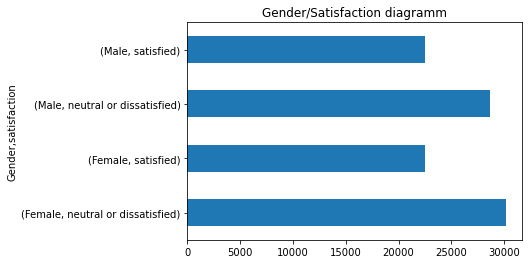

In [218]:
satisfaction.plot(
    kind='barh', 
    title='Gender/Satisfaction diagramm'  
    
);

2. Теперь сравним категории пассажиров в зависимости от их цели поездки. Выберите все верные утверждения:

In [219]:
type_of_travel = data.groupby(
    by=['Type of Travel', 'satisfaction']
    ).count()['id']

type_of_travel

Type of Travel   satisfaction           
Business travel  neutral or dissatisfied    29909
                 satisfied                  41746
Personal Travel  neutral or dissatisfied    28970
                 satisfied                   3279
Name: id, dtype: int64

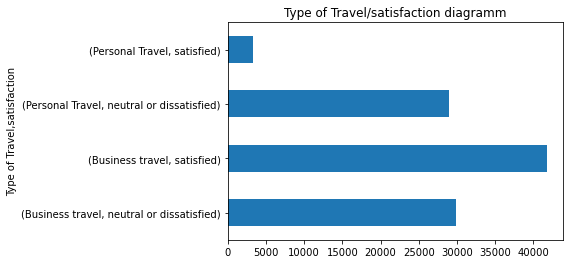

In [220]:
type_of_travel.plot(
    kind='barh', 
    title='Type of Travel/satisfaction diagramm',
    );

3. В каком туристическом классе наибольший процент довольных клиентов?

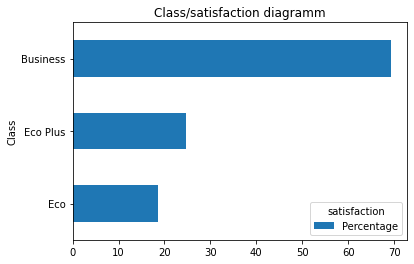

In [222]:
class_sat = data.pivot_table(
    values='id',
    index='Class',
    columns='satisfaction',
    aggfunc='count'
)

class_sat['Percentage'] = class_sat['satisfied']/(class_sat['satisfied']+class_sat['neutral or dissatisfied'])*100

class_sat_per = class_sat.sort_values('Percentage').drop(columns=['neutral or dissatisfied', 'satisfied'])

class_sat_per.plot(
    kind='barh', 
    title='Class/satisfaction diagramm',
    );


Перекодируем часть бинарных признаков, чтобы использовать их при обучении:

In [243]:
df = data.copy()

df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

### Задание 6.4

Для остальных категориальных признаков создайте dummy-переменные. Сделайте это с помощью функции get_dummies() из библиотеки Pandas, параметры не меняйте. Сколько теперь признаков в данных (включая целевую переменную)?

In [244]:
df = pd.get_dummies(df, columns=['Class'])

df.shape[1]

26

### Задание 6.5

Мы практически добрались до обучения модели. Разбейте данные на обучающую и тестовую выборки в соотношении 80/20, параметр random_state = 26. Сколько наблюдений попало в тестовую выборку?

In [264]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

X_test.shape[0]

20781

### Задание 6.6

Теперь нам необходимо реализовать масштабирование данных. Для этого обучите на обучающей выборке метод StandardScaler() и с помощью него преобразуйте и обучающую, и тестовую выборки. Не забудьте, что целевую переменную обрабатывать не нужно.

Примечание. Отметим, что если бы дальше мы работали только с деревьями, масштабирование бы не требовалось. Однако мы реализуем его, чтобы можно было обучать и другие модели и сравнивать полученные результаты.

В качестве ответа введите самое первое значение из матрицы преобразованных признаков тестовой выборки. Округлите значение до двух знаков после точки-разделителя.

In [267]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 
X_test[0][0].round(2)

0.94

### Задание 6.7

Перейдём к обучению моделей. В качестве первой модели возьмём самую простую — логистическую регрессию. Мы делаем это для того, чтобы потом сравнивать с ней полученные результаты: так вы сможете выяснить, насколько ансамбли смогут улучшить точность прогноза.

Обучите логистическую регрессию с параметрами по умолчанию на наших данных. В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя.

In [268]:
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('LogisticRegression F1 score: {:.3f}'.format(metrics.f1_score(y_test, y_pred)))

LogisticRegression F1 score: 0.855


### Задание 6.8

Теперь перейдём к бустингу. Начнём с обучения первой модели — AdaBoost. В качестве базовой модели для неё возьмите решающее дерево с параметром random_state = 26.

Обучите AdaBoost, зафиксировав random_state со значением 26 и задав темп обучения 0.01. В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя.

In [272]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
    base_estimator=tree.DecisionTreeClassifier(
        random_state=26
    ),
    learning_rate=0.01,
    random_state=26
)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print('AdaBoost f1-score: {:.3}'.format(metrics.f1_score(y_test, y_pred)))

AdaBoost f1-score: 0.94


### Задание 6.9

Перейдем к следующему алгоритму — градиентному бустингу.

Будем настраивать количество деревьев и темп обучения, делая перебор по следующей сетке:

In [277]:
params = {"n_estimators":2**np.arange(8), 
          "learning_rate":0.1**np.arange(3)}

Используйте для поиска оптимальных параметров GridSearchCV, а для ускорения работы алгоритма задайте параметр кросс-валидации, равный 3.

Какое наибольшее значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

Примечание. Необходимо указать лучший результат в методе GridSearchCV на тренировочных данных.

In [316]:
from sklearn.ensemble import GradientBoostingClassifier

gs = GridSearchCV(cv=3,
                  estimator=GradientBoostingClassifier(
                      random_state=26),
                  param_grid=params,
                  
                  )

gs.fit(X_train, y_train)

y_pred = gs.best_estimator_.predict(X_test)

print('GridSearch GradientBoosting f1-score: {:.3f}'.format(metrics.f1_score(y_test, y_pred)))

GridSearch GradientBoosting f1-score: 0.951


### Задание 6.10

Обучите алгоритм XGBoost. Так как он достаточно мощный «из коробки», определите его с параметрами по умолчанию, только задайте random_state = 26. Какое значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

Подсказка. Для того чтобы обучить алгоритм XGBoost для решения задачи классификации, вам понадобится XGBClassifier из библиотеки xgboost, установленной ранее. Вся дальнейшая последовательность действий (обучение модели, предсказание, оценка качества) идентична другим алгоритмам, например логистической регрессии.

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    random_state=26
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('XGBClassifier f1-score: {:.3f}'.format(metrics.f1_score(y_test, y_pred)))

### Задание 6.11

Обучите алгоритм CatBoost. Как и XGBoost, будем обучать его с настройками по умолчанию и заданным random_state = 26. Какое значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

Подсказка. Для того чтобы обучить алгоритм CatBoost, вам понадобится CatBoostClassifier() из библиотеки catboost, установленной ранее. Вся дальнейшая последовательность действий (обучение модели, предсказание, оценка качества) идентична другим алгоритмам, например логистической регрессии.

In [289]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(
    random_state=26
)

cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)

print('CatBoostClassifier f1-score: {:.3f}'.format(
    metrics.f1_score(y_test, y_pred)))

Learning rate set to 0.068023
0:	learn: 0.6018254	total: 247ms	remaining: 4m 6s
1:	learn: 0.5020788	total: 518ms	remaining: 4m 18s
2:	learn: 0.4472506	total: 938ms	remaining: 5m 11s
3:	learn: 0.4028683	total: 1.2s	remaining: 4m 57s
4:	learn: 0.3674742	total: 1.36s	remaining: 4m 31s
5:	learn: 0.3397838	total: 1.45s	remaining: 4m
6:	learn: 0.3121236	total: 1.57s	remaining: 3m 43s
7:	learn: 0.2917493	total: 1.73s	remaining: 3m 34s
8:	learn: 0.2749031	total: 1.84s	remaining: 3m 22s
9:	learn: 0.2575194	total: 1.94s	remaining: 3m 11s
10:	learn: 0.2473688	total: 2.02s	remaining: 3m 1s
11:	learn: 0.2377536	total: 2.1s	remaining: 2m 53s
12:	learn: 0.2279307	total: 2.22s	remaining: 2m 48s
13:	learn: 0.2212511	total: 2.3s	remaining: 2m 42s
14:	learn: 0.2100355	total: 2.38s	remaining: 2m 36s
15:	learn: 0.2025734	total: 2.44s	remaining: 2m 30s
16:	learn: 0.1942301	total: 2.49s	remaining: 2m 23s
17:	learn: 0.1877938	total: 2.55s	remaining: 2m 19s
18:	learn: 0.1832382	total: 2.64s	remaining: 2m 16s
1

### Задание 6.12

Выведите матрицу ошибок для алгоритма, который получил наилучшие показатели качества модели на обучающей выборке (будем считать, что оцениваем по f1_score). Матрица ошибок выводится в следующем формате:

![](https://lms.skillfactory.ru/assets/courseware/v1/8352c460ae8dce14e5f55dfe15ea4c25/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_6_2.png)

**Подсказка**. Для того чтобы построить матрицу ошибок в CatBoost, необходимо использовать следующий шаблон:

get_confusion_matrix(модель, Pool(признаки обучающей выборки, целевая переменная обучающей выборки))

Более подробно построение матрицы ошибок можно изучить [в документации](https://catboost.ai/en/docs/concepts/python-reference_utils_get_confusion_matrix).

In [307]:
from catboost.utils import get_confusion_matrix
from catboost import Pool

get_confusion_matrix(cb, Pool(X_train, y_train))

array([[46668.,   538.],
       [ 1255., 34662.]])

### Задание 6.13

Оцените важность признаков для модели из предыдущего задания. Отметьте признак, который оказывает наибольшее влияние на значение целевой переменной:

In [ ]:
feature_imps = pd.DataFrame(
    {'feature' : gs.best_estimator_.feature_names_in_,
    'importance' : gs.best_estimator_.feature_importances_}
    )
feature_imps.sort_values(by='importance', ascending=False)[:3]

In [315]:
pd.DataFrame(   
             {'feature' : X.columns,
              'importance' : cb.feature_importances_}
).sort_values('importance', ascending=False)

,feature,importance
6,Inflight wifi service,25.260967
4,Type of Travel,18.532444
2,Customer Type,7.373753
11,Online boarding,7.331027
22,Class_Business,5.520561
17,Checkin service,3.864023
3,Age,3.791612
16,Baggage handling,3.586852
9,Gate location,3.283956
12,Seat comfort,2.971680


⭐ Поздравляем, вы справились с достаточно сложной задачей и добились высокого качества выделения. Советуем не останавливаться на достигнутом и попробовать организовать наиболее посещаемый ансамбль. Тем не менее, будьте готовы: перебор гиперпараметров на большие объёмы данных занимает достаточно много времени.

Уже в следующем юните вы изучите ещё один вид ансамблей и пополните свой арсенал алгоритмов →

# 7. Стекинг

✍ В предыдущих юнитах мы разобрались с ансамблями, в которых объединение нескольких моделей одного типа помогает повысить качество предсказания при решении задачи регрессии или классификации. А что, если мы объединим модели двух или трёх типов (например, логистическую регрессию, метод опорных векторов и KNN)? Может быть, это сделает результат ещё лучше? Да, это действительно может помочь. В некоторых случаях очень полезно использовать различные виды моделей, чтобы повысить точность прогнозирования.

? Тогда возникает следующий вопрос: как именно мы можем объединить несколько моделей разных типов?

Здесь нам на помощь приходит **стекинг** — третий вид ансамблирования моделей. Принцип реализации стекинга мы уже обсудили в одном из предыдущих модулей, а в этом юните мы формализуем всё изученное в чёткий алгоритм и ещё раз закрепим этот материал. Математических выкладок здесь уже практически не будет, так как стекинг является абсолютной эвристикой, под которой нет никакого теоретического фундамента — его эффективность можно наблюдать только на практике.

> **Стекинг** —  это агрегация ответов моделей машинного обучения. Подход использует понятие **базовых моделей**, каждая из которых обучается независимо от остальных, и **метамодели**, которая использует предсказания базовых моделей как признаки.

![](https://lms.skillfactory.ru/assets/courseware/v1/760fd97b573f90a5da57e5829d6c3bbd/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_7_1.png)

Представим, что мы обучили K базовых моделей $a_1 (x), ..., a_K (x)$ на некоторой выборке и теперь хотим использовать их результаты для обучения метамодели $f(x)$.

Самый простой вариант — обучить метамодель на той же выборке. Тогда функция потерь будет выражаться следующим образом:

$$\sum_{i=1}^{N} L\left(y_{i}, f\left(a_{1}\left(x_{i}\right), \ldots, a_{K}\left(x_{i}\right)\right)\right) \rightarrow \min _{f}$$

→ В таком случае метамодель $f$ будет отдавать предпочтение тем базовым алгоритмам, которые сильнее других подстроились под целевую переменную при обучении, так как по их прогнозам проще всего предсказывать правильные ответы. Если среди базовых алгоритмов будет тот, который просто запомнил все ответы на обучающей выборке, то метаалгоритму будет проще всего использовать только прогнозы данного переобученного базового алгоритма, ведь такой подход будет давать максимальный результат. Но, разумеется, высокое качество в таком случае будет только на обучающей выборке — на тестовой оно будет значительно хуже.

Поэтому важно отметить, что **базовые алгоритмы и метамодель должны обучаться на разных выборках**. 

Разобьём выборку на $L$ частей: $X_1, X_2, ..., X_L$. Пусть $a^{-l}_j (x)$ — это базовый $j$-й алгоритм, который обучен на всех подвыборках, кроме первой.

Для обучения метамодели мы будем минимизировать следующий функционал:

$$\sum_{l=1}^{L} \sum_{\left(x_{i}, y_{j}) \in X_{l}\right.} L\left(y_{i}, f\left(a_{1}^{-l}\left(x_{i}\right), \ldots, a_{K}^{-l}\left(x_{i}\right)\right)\right) \rightarrow \min _{f}$$

Как мы уже выяснили, чтобы избежать переобучения, необходимо обучать базовые модели и метамодель на разных выборках. Это можно делать с помощью **блендинга** или **стекинга**.

## БЛЕНДИНГ

> **Блендинг** является простейшей реализацией стекинга.

Объясним его суть на **примере** ↓

Предположим, у нас есть обучающая выборка $X$, которую мы делим пополам: первая часть используется для обучения базовых моделей, а на второй базовые модели делают предсказания — метапризнаки, на которых и обучается в дальнейшем метамодель.

Формализовать этот алгоритм можно следующим образом:

* Пусть у нас есть обучающая выборка $(X,y)$ и тестовая выборка $(X_{test}, y_{test})$.
* Мы хотим использовать $K$ базовых моделей: $a_1 (x), a_2 (x), ..., a_K (x)$.
* Делим обучающую выборку на две части: $(X_{train}, y_{train})$ и $(X_{meta}, y_{meta})$.
* Введём для удобства обозначения: $(X_{train}, y_{train}) = A, \ (X_{meta}, y_{meta}) = B, \ (X_{test}, y_{test}) = C$.
* Для каждой модели $a_i (x)$:
    * Обучаем модель $a_i (x)$ на подвыборке $A$.
    * Для каждого объекта из подвыборки $B$ делаем предсказание с помощью $a_i (x)$ — получаем столбец новых признаков для метамодели.
    * Для каждого объекта из подвыборки $C$ делаем предсказание с помощью $a_i (x)$ — получаем ещё один столбец признаков для метамодели.
* Итак, получили матрицу метапризнаков $B_{meta}$ из предсказаний $a_i (x)$ для подвыборки $B$ и матрицу метапризнаков $C_meta$ из предсказаний $a_i (x)$ для подвыборки $C$.
* Обучаем метамодель на подвыборке $B_{meta}$.
* С помощью обученной метамодели делаем предсказания для всех объектов из $C_{meta}$ — это и будут наши ответы.

Важно отметить, что для блендинга можно и нужно использовать базовые алгоритмы разной природы: например, вы можете объединять KNN, метод опорных векторов, решающие деревья и на результатах этих базовых алгоритмов обучать метамодель.

Метамодель тоже может быть разной природы, но часто в качестве неё берут просто линейную модель:

$$f(x) = \sum^K_{i = 1} w_i a_i (x)$$

Схематично описанный выше алгоритм можно изобразить следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/2d3283bba09d12ce993a7984cb111036/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_7_2.png)

## СТЕКИНГ

К сожалению, у блендинга есть проблема: ни базовые модели, ни метамодель не обучаются на полных данных.

Эту проблему решает **стекинг**.

Чтобы в итоге все модели могли «познакомиться» с полным набором данных, можно использовать подход, аналогичный кросс-валидации: мы можем разделять выборку на $L$ частей, обучать модель на части $L-1$ и делать предсказание на оставшейся. Определённого правила для выбора количества частей нет, но, разумеется, чем больше их будет, тем выше будет качество (времени на обучение также будет потрачено больше).

Алгоритм стекинга следующий:

* Пусть у нас есть обучающая выборка $(X,y)$ и тестовая выборка $(X_{test}, y_{test})$.
* Мы хотим использовать $K$ базовых моделей: $a_1 (x), a_2 (x), ..., a_K (x)$.
* Делим обучающую выборку на $L$ частей: $A_1, A_2, ..., A_L$.
* Для каждой части $A_i$ из $L$ частей обучающей выборки:
    * Обучаем все $K$ базовых моделей на всех частях выборки, кроме $A_i$.
    * Делаем предсказание для каждого объекта из подвыборки $A_i$.
    * В итоге получаем новые признаки для метамодели.
* Обучаем базовые модели на всей обучающей выборке $(X,y)$, делаем предсказание на тестовой выборке $(X_{test}, y_{test})$ и получаем метапризнаки для тестовой выборки — матрицу $C_{meta}$.
* Обучаем метаалгоритм на новых признаках метамодели из обучающей выборки.
* Делаем предсказание с помощью метаалгоритма для $C_{meta}$ — это и будут наши ответы.

Схематично можно изобразить это так:

![](https://lms.skillfactory.ru/assets/courseware/v1/fa4292a928728baaf9f760df93701a99/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_7_3.png)

Несомненный **плюс стекинга** в том, что использование различных видов алгоритмов может помочь идентифицировать сложные зависимости. Например, ниже можно видеть иллюстрацию задачи классификации, где структура данных довольно сложная, но при использовании нескольких алгоритмов получается её выявить.

![](https://lms.skillfactory.ru/assets/courseware/v1/fa8ea006a8565455c1182f447b19dc50/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_7_4.png)

Также метод стекинга можно реализовать с более чем двумя уровнями — это называется **многоуровневым стекингом**. В таком случае мы определяем базовые модели, затем обучаем ряд метамоделей на результатах базовых моделей и в итоге обучаем конечную метамодель. Рассматривать и реализовывать такой подход мы не будем, так как улучшение качества будет незначительным, а вычислительные затраты — невероятно высокими.

![](https://lms.skillfactory.ru/assets/courseware/v1/85b7891b4e235ec1c465f824a20e84e0/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_7_5.png)

Возможно, вы заметили, что принцип многоуровневого стекинга очень похож на принцип работы искусственных нейронных сетей, о которых мы говорили ранее в модуле про оптимизацию, и это действительно так.

Давайте вспомним **плюсы и минусы стекинга**, которые мы уже рассматривали в предыдущих модулях:

### Плюсы

* хорошо параллелится (модели обучаются параллельно);
* хорошо подходит для использования различных по природе базовых моделей.

### Минусы

* качество сильно зависит от качества базовых моделей;
* плохо интерпретируемые результаты.

Теперь, когда теоретические основы изучены, наступает время **практики**: потренируемся в решении задач с использованием стекинга ↓

Мы будем работать с [данными](https://lms.skillfactory.ru/assets/courseware/v1/a21a8975fee2a747c0a0f335a4a9e0f4/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/Frogs_MFCCs.zip), которые содержат информацию о звуках, издаваемых лягушками, и характеристики этих звуков.

Необходимо **классифицировать семейства лягушек** в зависимости от особенностей их кваканья и прочих звуковых эффектов.

Будем решать задачу бинарной классификации по выявлению лягушек, которые относятся к семейству 'Dendrobatidae' (признак 'Family'). Семейство 'Dendrobatidae' будет классом 1, все остальные семейства — классом 0.

![](https://lms.skillfactory.ru/assets/courseware/v1/31b83e2f555ad8e55b31e3bb88f0ec58/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_7_6.jpg)

Источник изображения
В качестве признаков, которые мы будем использовать для предсказания, необходимо взять все, кроме:

* 'Family' — семейство лягушек;
* 'Genus' — род лягушек;
* 'Species' — вид лягушек;
* 'RecordID' — ID записи.

Все остальные признаки относятся к акустическим особенностям кваканья — они-то нам и понадобятся, чтобы определить, к какому семейству относится лягушка.

Разделите выборку на обучающую и тестовую в соотношении 80/20, параметр random_state = 31.

In [16]:
import pandas as pd

from sklearn.model_selection import train_test_split

data = pd.read_csv('data/Frogs_MFCCs.zip')

data.Family = data.Family.apply(
    lambda x: 1 if x == 'Dendrobatidae' else 0)

X = data.drop(columns = ['Family', 'Genus', 'Species', 'RecordID'])
y = data.Family

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=31)


### Задание 7.5

Для начала обучите на наших данных случайный лес с десятью решающими деревьями. Воспользуйтесь параметрами по умолчанию. В качестве значения random_state возьмите число 42.

Оцените значение $F1$-меры и введите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

In [18]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score

rf = RandomForestClassifier(
    n_estimators=10,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('RandomForest F1-score: {:.2}'.format(f1_score(y_pred, y_test)))

RandomForest F1-score: 0.97


### Задание 7.6

Теперь попробуем улучшить качество нашего предсказания за счёт использования стекинга.

В качестве базовых моделей выберите следующие:

* **случайный лес** с десятью деревьями, random_state = 31;
* **KNN**, количество соседей = 11;
* **наивный байесовский классификатор** с параметрами по умолчанию, в качестве метода возьмите GaussianNB().

В качестве метамодели выберите логистическую регрессию.

Обучите модели и сделайте предсказание целевой метки для тестового набора данных.

Рассчитайте $F1$-меру для тестового набора данных и введите её в качестве ответа, предварительно **округлив до двух знаков после точки-разделителя**.

In [26]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [27]:
estimators = [
    ('rf', RandomForestClassifier(
        n_estimators=10,
        random_state=31)),
    ('knn', KNeighborsClassifier(
        n_neighbors=11)),
    ('nb', GaussianNB())
]

stacking = StackingClassifier(    
    estimators=estimators,
    final_estimator=LogisticRegression(),
)

stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)
print('Stacking F1-score: {:.2}'.format(f1_score(y_pred, y_test)))


Stacking F1-score: 0.99


Отлично, мы увидели, как сильно улучшает качество применение стекинга. Несмотря на недостатки этого метода (долгое обучение, необходимость подбора параметров, редкое использование на практике — зачастую лишь для того, чтобы добыть дополнительные баллы на Kaggle), в определённых ситуациях он может быть очень полезен. Если у вас достаточно вычислительных ресурсов, вы готовы потратить время на подбор моделей и параметров, а точность модели крайне важна, стекинг сослужит вам хорошую службу.

Теперь, когда в вашем арсенале есть все ансамблевые методы, нам осталось лишь подвести итоги этого модуля →

# 8. Итоги

✍ В этом модуле мы рассмотрели ансамблевые методы машинного обучения. Мы не только повторили основные концепции, но и разобрались с математическими основами алгоритмов.

Давайте ещё раз посмотрим на те ансамбли, которые мы изучили:

БЭГГИНГ

![](https://lms.skillfactory.ru/assets/courseware/v1/e62f9c293fb2c6ffd7e438197bf03e90/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_8_1.png)

Параллельное обучение одинаковых алгоритмов. Результирующий прогноз формируется как среднее арифметическое моделей (случай регрессии) или по большему количеству голосов (случай классификации).

БУСТИНГ

![](https://lms.skillfactory.ru/assets/courseware/v1/51c72308fa8d6dad07bd9a5f09a83ab6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_8_2.png)

Последовательное обучение одинаковых алгоритмов, каждый из которых исправляет ошибки предыдущих до достижения необходимого качества.

СТЕКИНГ

![](https://lms.skillfactory.ru/assets/courseware/v1/7c28d960b938cd73e5908b9746548738/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md9_8_3.png)

Параллельное и независимое обучение моделей (не обязательно одной природы), использование их как факторов для обучения метамодели, которая и формирует итоговый результат.

Теперь для каждого ансамбля вы можете:

* объяснить его суть и рассказать про стоящую за ним математическую составляющую;
* применить его для решения задачи классификации и регрессии;
* настроить гиперпараметры ансамбля так, чтобы получить наилучшее качество модели.

Если вы хотите ознакомиться с дополнительными материалами, чтобы ещё больше углубить свои знания, рекомендуем обратить внимание на следующие статьи:

* [О тонкостях настройки гиперпараметров в ансамблях](https://habr.com/ru/post/672486/)
* [О развитии ансамблевых методов машинного обучения](https://www.researchgate.net/publication/278019662_Istoria_razvitia_ansamblevyh_metodov_klassifikacii_v_masinnom_obucenii)

⭐ Поздравляем, вы справились со всеми заданиями, и теперь можно считать, что вы прекрасно разбираетесь в ансамблях моделей, а главное — понимаете их математические основы и сможете ответить даже на самые сложные вопросы на собеседовании при приёме на работу.

Вы ещё встретитесь с ансамблями при выполнении проекта, а в следующих модулях вас ждёт увлекательное изучение математических тонкостей алгоритмов кластеризации →